In [ ]:
#gnuplot example
# parameters
theta=(25./180.)*pi
i=(80./180.)*pi
lapse=1./3.
index=2.

# function
mu(x)= sin(theta)*sin(i)*cos(2*pi*x)+cos(theta)*cos(i)
cosalpha(x,lapse)=mu(x)*(1-lapse)+lapse
cosalphab(x,lapse)=-mu(x)*(1-lapse)+lapse
Ftmp(x,lapse)=mu(x)*(1.-lapse)+lapse
Fbtmp(x,lapse)=-mu(x)*(1.-lapse)+lapse

F(x,lapse)=(Ftmp(x,lapse)>0) ? Ftmp(x,lapse) : 0 
Fb(x,lapse)=(Fbtmp(x,lapse)>0) ? Fbtmp(x,lapse) : 0 

Fbeam(x,lapse)=(Ftmp(x,lapse)>0) ? Ftmp(x,lapse)*cosalpha(x,lapse)**index : 0 
Fbbeam(x,lapse)=(Fbtmp(x,lapse)>0) ? Fbtmp(x,lapse)*cosalphab(x,lapse)**index : 0


# plot
set term postscript enhanced solid color eps "Times-Roman, 25"
set out "noborder.eps"

set point 1000

set format xy ""
set border 0

plot [0:2] \
14*Fbeam(x-0.75,0.33)+14*Fbbeam(x-0.75,0.33) lw 5,\
14.7*Fbeam(x-0.75,0.3)+14.7*Fbbeam(x-0.75,0.3) lw 5,\
13.5*Fbeam(x-0.75,0.35)+13.5*Fbbeam(x-0.75,0.35) lw 5,\
13.5*Fbeam(x-0.75,0.35)+13.5*Fbbeam(x-0.75,0.25) lw 5,\
12.4*Fbeam(x-0.75,0.4)+12.4*Fbbeam(x-0.75,0.4) lw 5

457.1428571428569
[ 2.41542163e+03  1.95523107e+00 -1.35131778e+00]


Text(0, 0.5, 'Counts')

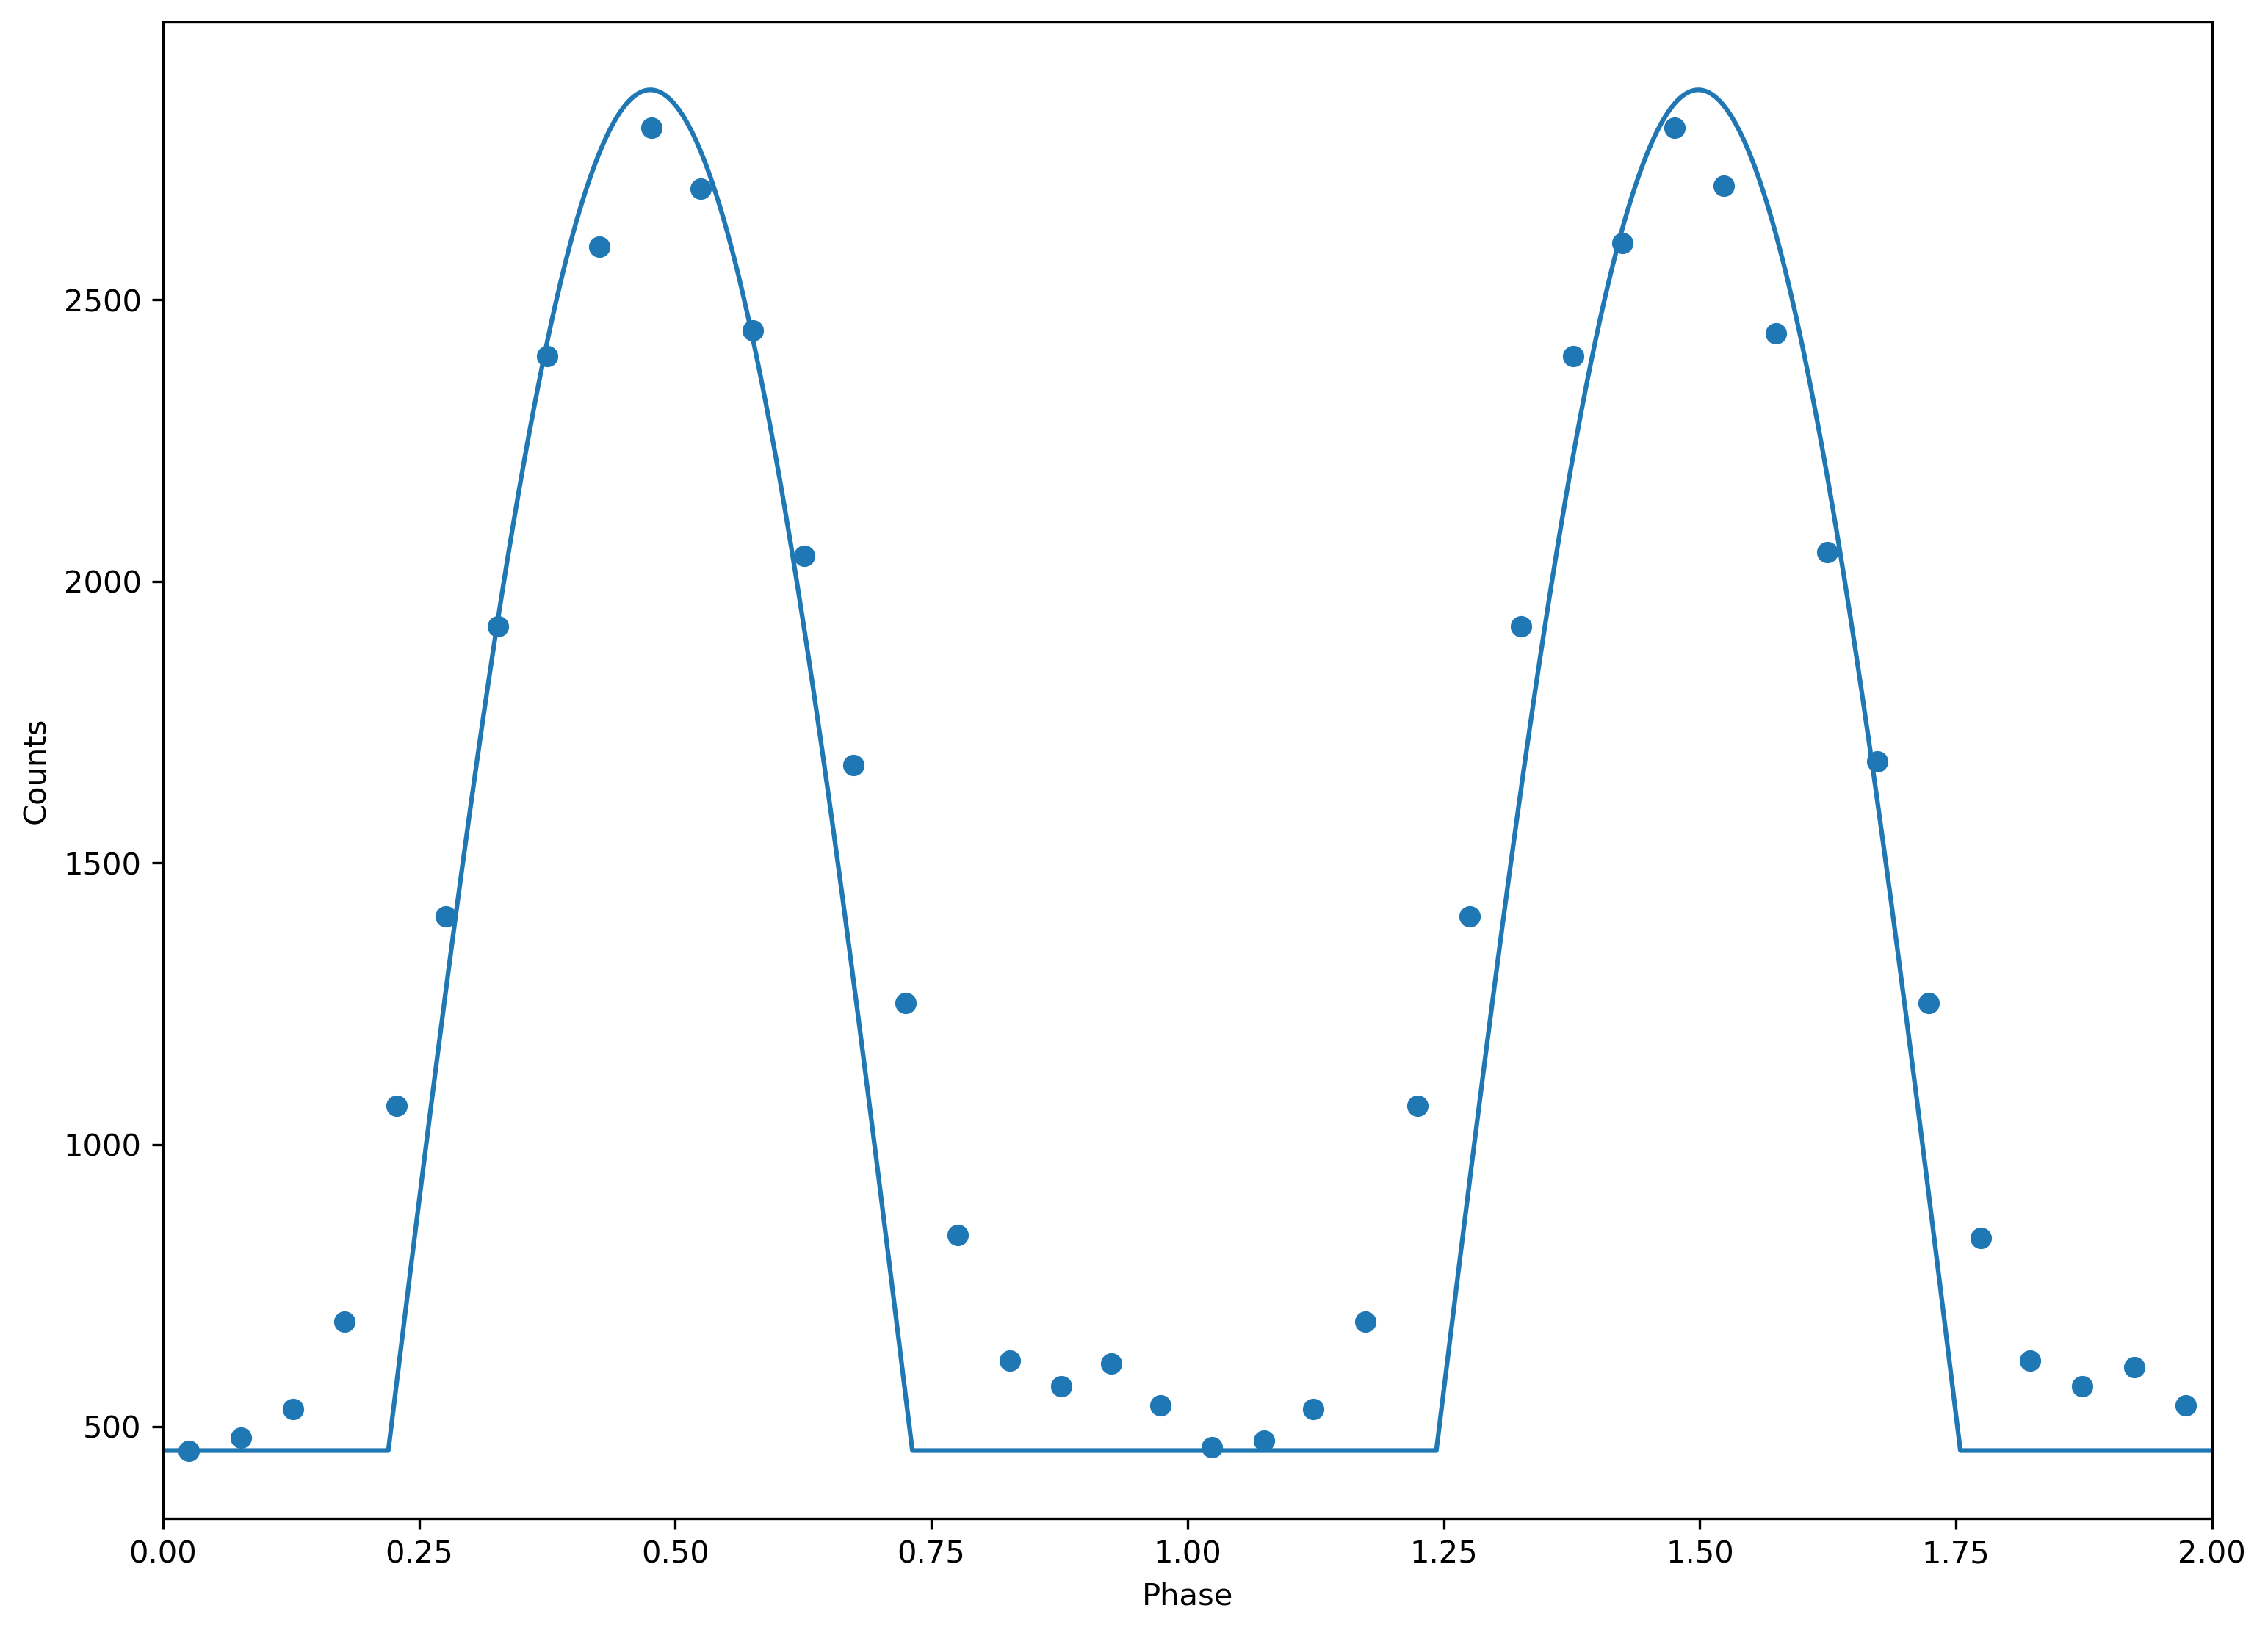

In [14]:
#pure-newton
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize

#1E 1048.1−5937 from paper:NUSTAR OBSERVATIONS OF MAGNETAR 1E 1048.1−5937     Auther:C. Yang
df = pd.read_csv('pulse_profile_data.csv', header = 0)
x_data = df.iloc[:,0]
y_data = df.iloc[:,1]
#print(x, y)
#only use data of one phase
# x_data = x_data[0:16]
# y_data = y_data[0:16]
print(y_data[0])

parameter_initial = np.array([4600, 2, -0.5])

# def func(x, a, b, c, d):
#     return (a * np.sin(b * 3.1415926 * x + c) + abs(a * np.sin(b * 3.1415926 * x + c))) / 2 + d

#set d as minium y
def func(x, a, b, c):
    return (a * np.sin(b * 3.1415926 * x + c) + abs(a * np.sin(b * 3.1415926 * x + c))) / 2 + 457.1428571428569

# paramater_optimal, covariance = scipy.optimize.curve_fit(func, x_data, y_data, p0 = parameter_initial)
# print(paramater_optimal)
# fitting = func(x, paramater_optimal[0], paramater_optimal[1], paramater_optimal[2], paramater_optimal[3])

paramater_optimal, covariance = scipy.optimize.curve_fit(func, x_data, y_data, p0 = parameter_initial)
print(paramater_optimal)
fitting = func(x, paramater_optimal[0], paramater_optimal[1], paramater_optimal[2])

x = np.linspace(-0.5, 2.5, 10000)

fig, ax = plt.subplots(dpi = 300, figsize = (12, 9))
plt.scatter(x_data, y_data)
plt.xlim(0, 2)
plt.plot(x, fitting)
ax.set_xlabel('Phase')
ax.set_ylabel('Counts')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize

# parameters
theta = (25. / 180.) * np.pi()
i = (80. / 180.) * np.pi()
lapse = 1. / 3.
index = 2.

# function(x as time t), lapse = r_g / R, r_g = 2GM / c^2
mu(x) = sin(theta) * sin(i) * cos(2 * pi * x) + cos(theta) * cos(i)
cosalpha(x, lapse) = mu(x) * (1 - lapse) + lapse
cosalphab(x, lapse) = -mu(x) * (1 - lapse) + lapse
Ftmp(x, lapse) = mu(x) * (1. - lapse) + lapse
Fbtmp(x, lapse) = -mu(x) * (1. - lapse) + lapse

F(x, lapse) = (Ftmp(x, lapse) > 0) ? Ftmp(x, lapse) : 0 
Fb(x, lapse) = (Fbtmp(x, lapse) > 0) ? Fbtmp(x, lapse) : 0 

Fbeam(x, lapse) = (Ftmp(x, lapse) > 0) ? Ftmp(x, lapse) * cosalpha(x, lapse) ** index : 0 
Fbbeam(x, lapse) = (Fbtmp(x, lapse) > 0) ? Fbtmp(x, lapse) * cosalphab(x, lapse) ** index : 0


# plot
set term postscript enhanced solid color eps "Times-Roman, 25"
set out "noborder.eps"

set point 1000

set format xy ""
set border 0

plot [0 : 2] \
14 * Fbeam(x - 0.75, 0.33) + 14 * Fbbeam(x - 0.75, 0.33) lw 5,\
14.7 * Fbeam(x - 0.75, 0.3) + 14.7 * Fbbeam(x - 0.75, 0.3) lw 5,\
13.5 * Fbeam(x - 0.75, 0.35) + 13.5 * Fbbeam(x - 0.75, 0.35) lw 5,\
13.5 * Fbeam(x - 0.75, 0.35) + 13.5 * Fbbeam(x - 0.75, 0.25) lw 5,\
12.4 * Fbeam(x - 0.75, 0.4) + 12.4 * Fbbeam(x - 0.75, 0.4) lw 5

457.1428571428569
[ 95.81869346  70.68596109 998.50665062]


Text(0, 0.5, 'Counts')

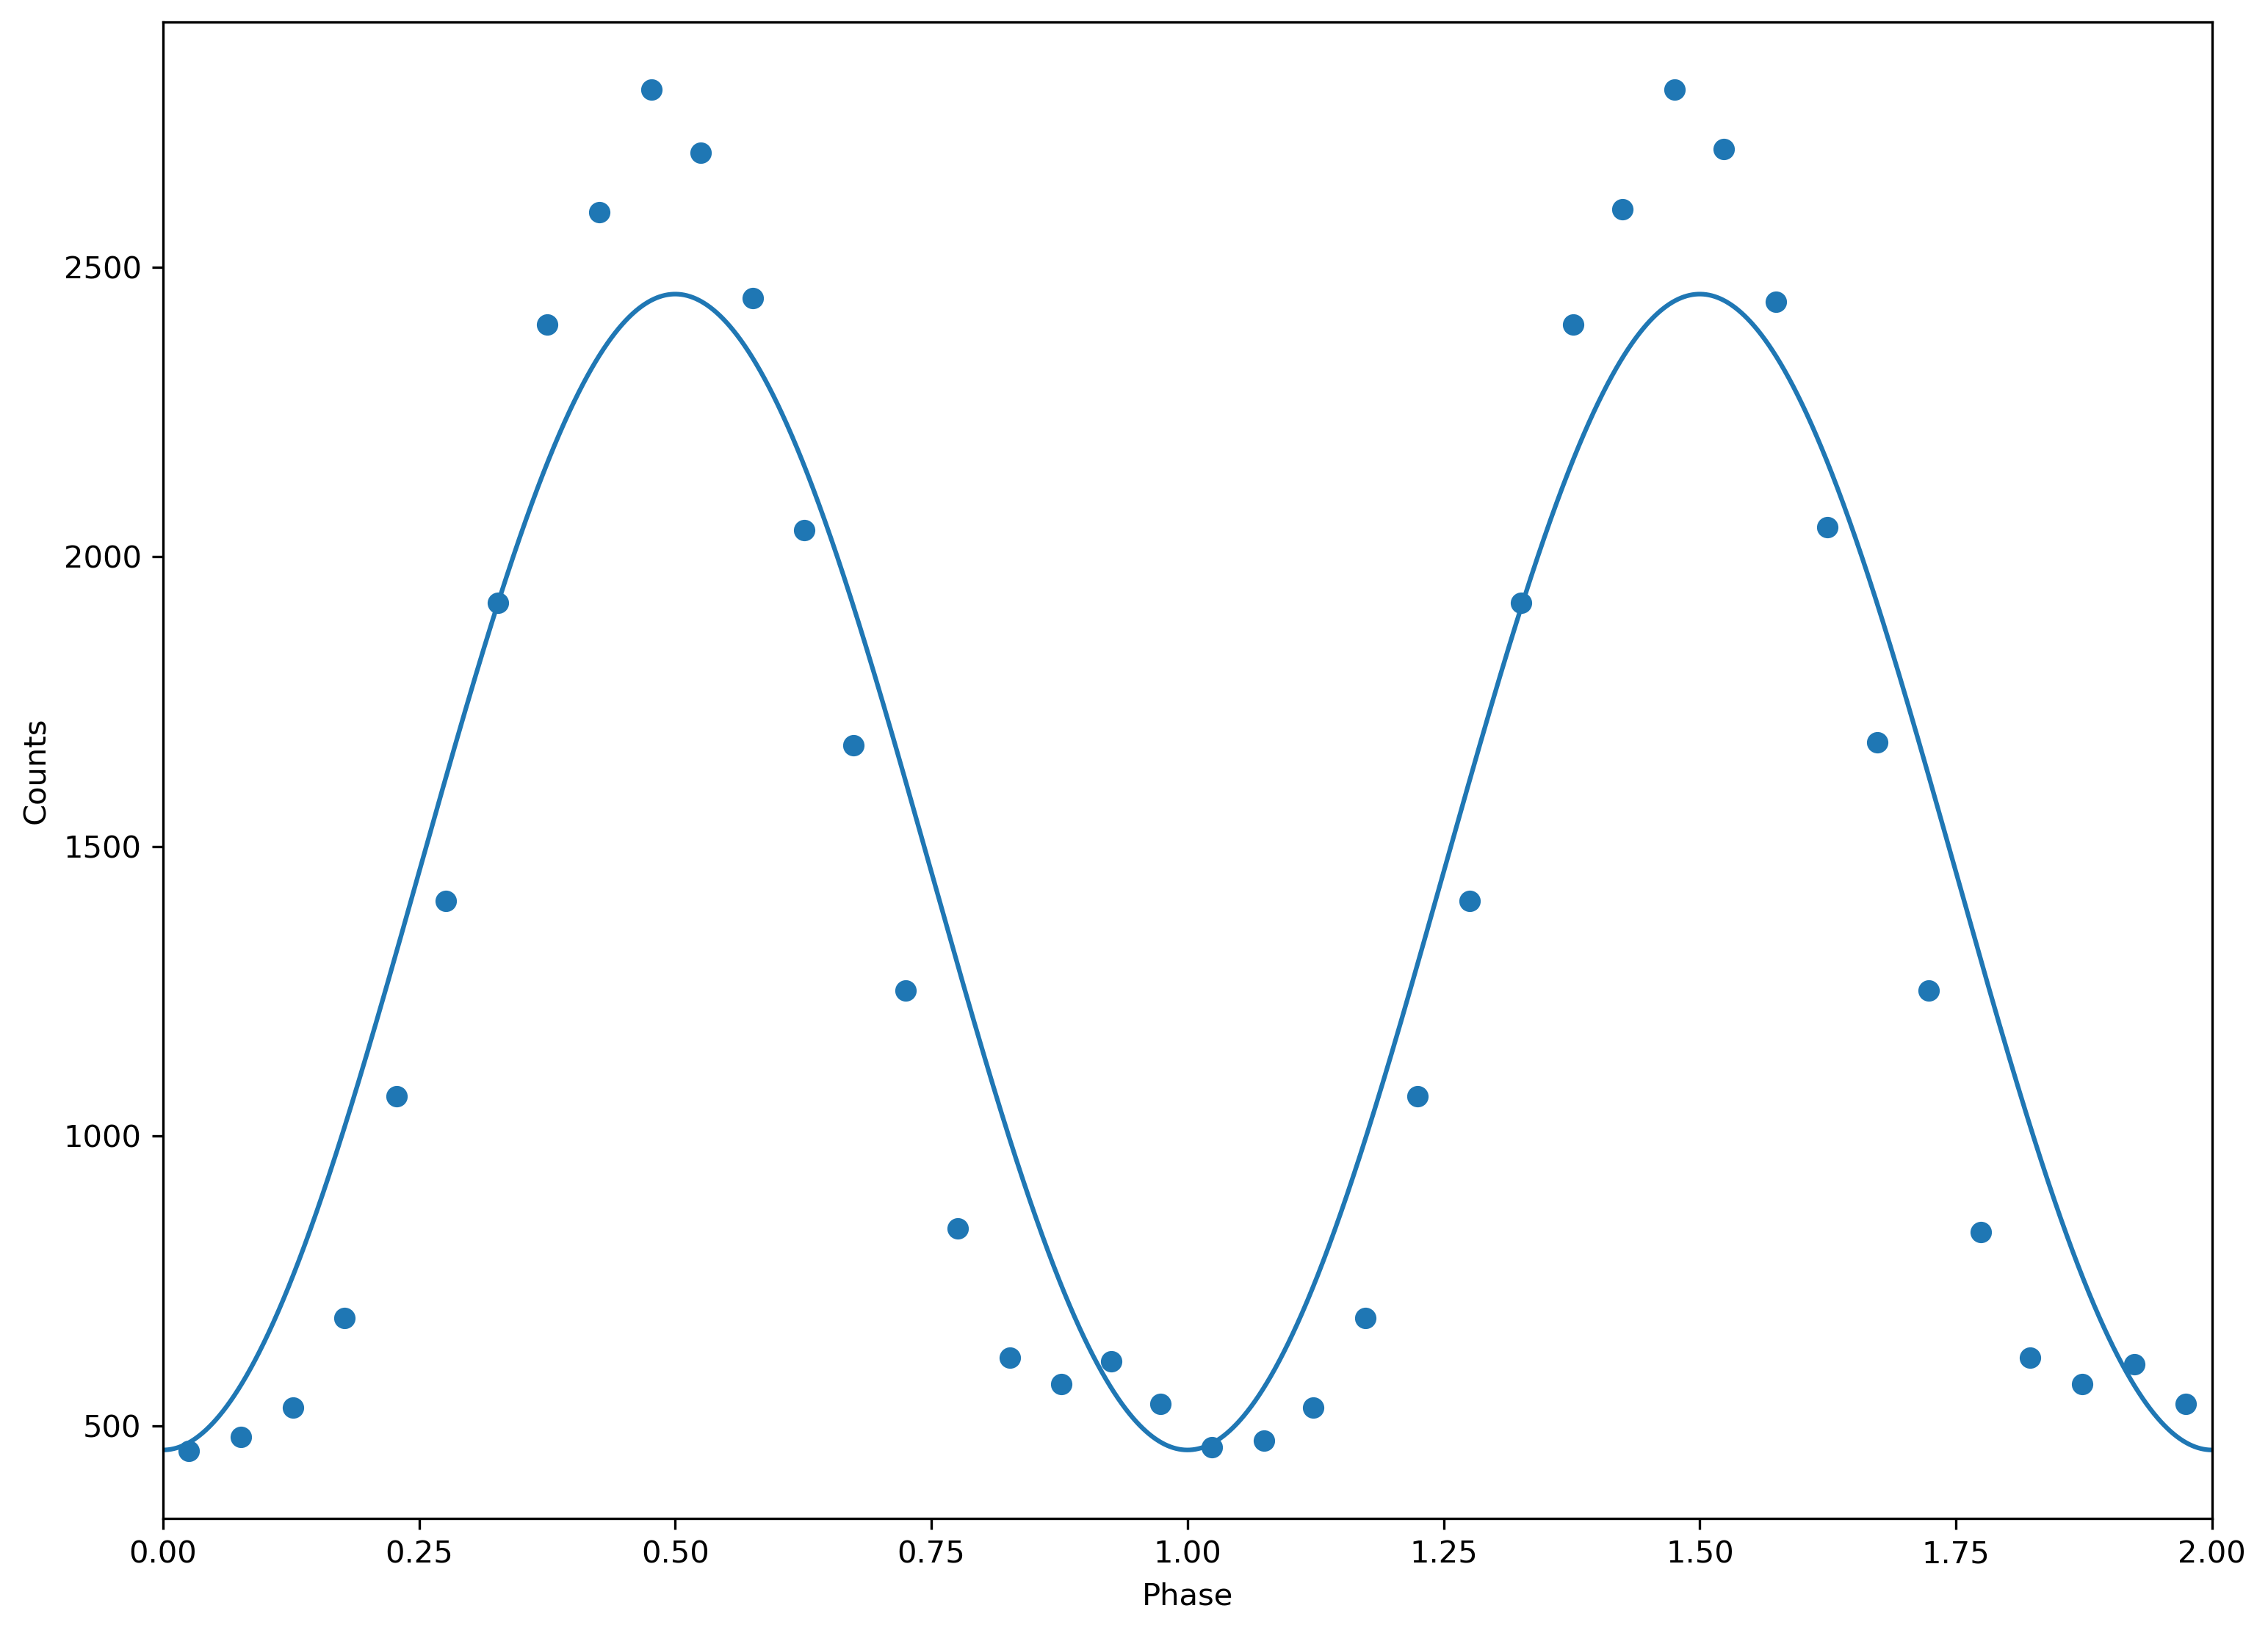

In [15]:
#mu(x) = sin(theta) * sin(i) * cos(2 * pi * x) + cos(theta) * cos(i)

#try to fit by light bending model

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize

def (x, theta, i, lapse):
    y = np.sin(theta) * np.sin(i) * np.cos(2 * 3.1415926 * x) + np.cos(theta) * np.cos(i)
    F = y * (1 - lapse) + lapse
    return F

#1E 1048.1−5937 from paper:NUSTAR OBSERVATIONS OF MAGNETAR 1E 1048.1−5937     Auther:C. Yang
df = pd.read_csv('pulse_profile_data.csv', header = 0)
x_data = df.iloc[:,0]
y_data = df.iloc[:,1]
#print(x, y)
#only use data of one phase
# x_data = x_data[0:16]
# y_data = y_data[0:16]
print(y_data[0])

x = np.linspace(-0.5, 2.5, 10000)

parameter_initial = np.array([- 3.1415926 / 18, -7 * 3.1415926 / 18, 1 / 3])

# def func(x, a, b, c, d):
#     return (a * np.sin(b * 3.1415926 * x + c) + abs(a * np.sin(b * 3.1415926 * x + c))) / 2 + d

#set d as minium y
def func(x, a, b, c):
    return (mu(x, a, b, c) + abs(mu(x, a, b, c))) / 2 + 457.1428571428569

# paramater_optimal, covariance = scipy.optimize.curve_fit(func, x_data, y_data, p0 = parameter_initial)
# print(paramater_optimal)
# fitting = func(x, paramater_optimal[0], paramater_optimal[1], paramater_optimal[2], paramater_optimal[3])

paramater_optimal, covariance = scipy.optimize.curve_fit(func, x_data, y_data, p0 = parameter_initial)
print(paramater_optimal)
fitting = func(x, paramater_optimal[0], paramater_optimal[1], paramater_optimal[2])

fig, ax = plt.subplots(dpi = 300, figsize = (12, 9))
plt.scatter(x_data, y_data)
plt.xlim(0, 2)
plt.plot(x, fitting)
ax.set_xlabel('Phase')
ax.set_ylabel('Counts')

457.1428571428569
[-2.13456350e+00  9.06885089e-01  3.67295252e+03]


Text(0, 0.5, 'Counts')

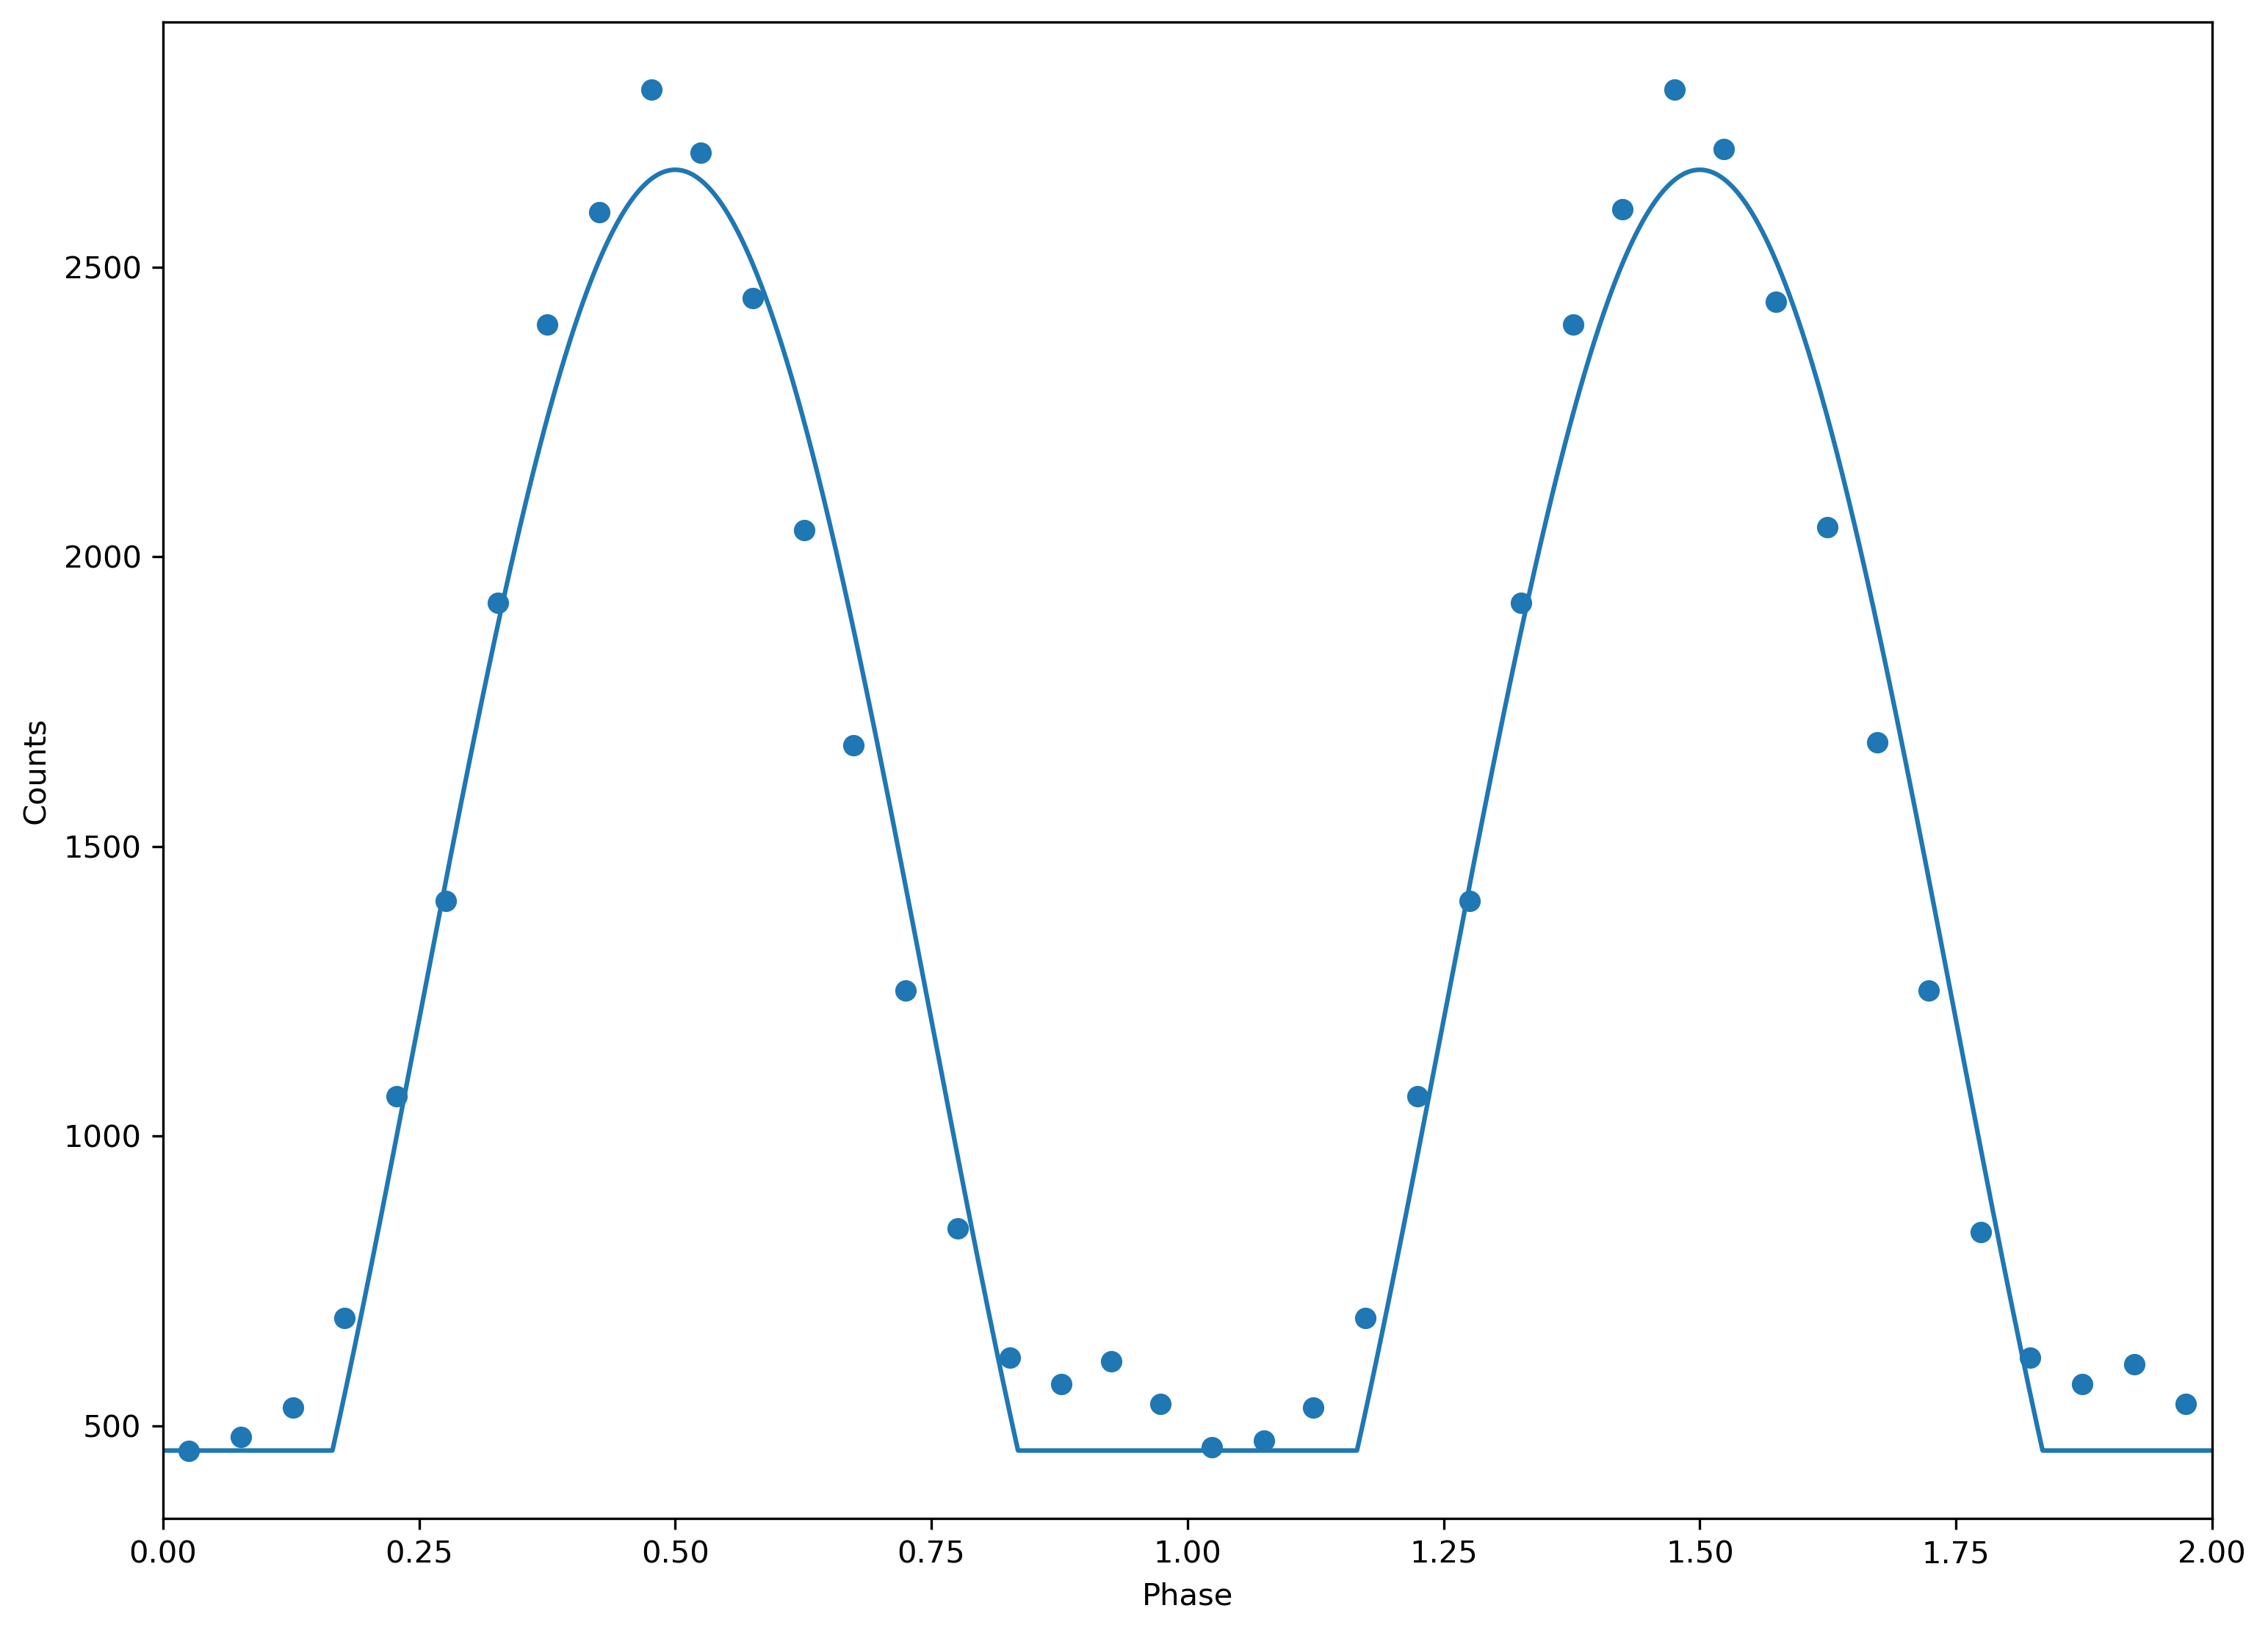

In [38]:
#set lapse as 1/2.5

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize

def mu(x, theta, i, m):
    y = np.sin(theta) * np.sin(i) * np.cos(2 * 3.1415926 * x) + np.cos(theta) * np.cos(i)
    F = m * (y * (1. - 1. / 2.5) + 1. / 2.5)
    return F

#1E 1048.1−5937 from paper:NUSTAR OBSERVATIONS OF MAGNETAR 1E 1048.1−5937     Auther:C. Yang
df = pd.read_csv('pulse_profile_data.csv', header = 0)
x_data = df.iloc[:,0]
y_data = df.iloc[:,1]
#print(x, y)
#only use data of one phase
# x_data = x_data[0:16]
# y_data = y_data[0:16]
print(y_data[0])

x = np.linspace(-0.5, 2.5, 10000)

parameter_initial = np.array([-1.5, 1, 4000])

# def func(x, a, b, c, d):
#     return (a * np.sin(b * 3.1415926 * x + c) + abs(a * np.sin(b * 3.1415926 * x + c))) / 2 + d

#set d as minium y
def func(x, a, b, c):
    return (mu(x, a, b, c) + abs(mu(x, a, b, c))) / 2 + 457.1428571428569

# paramater_optimal, covariance = scipy.optimize.curve_fit(func, x_data, y_data, p0 = parameter_initial)
# print(paramater_optimal)
# fitting = func(x, paramater_optimal[0], paramater_optimal[1], paramater_optimal[2], paramater_optimal[3])

paramater_optimal, covariance = scipy.optimize.curve_fit(func, x_data, y_data, p0 = parameter_initial)
print(paramater_optimal)
fitting = func(x, paramater_optimal[0], paramater_optimal[1], paramater_optimal[2])


#calculate S
S_hotspot = 


fig, ax = plt.subplots(dpi = 300, figsize = (12, 9))
plt.scatter(x_data, y_data)
plt.xlim(0, 2)
plt.plot(x, fitting)
ax.set_xlabel('Phase')
ax.set_ylabel('Counts')

457.1428571428569
[-2.13456350e+00  9.06885089e-01  3.67295252e+03]
[-1.67024626e+00  1.14262367e+00  2.43097888e+03]


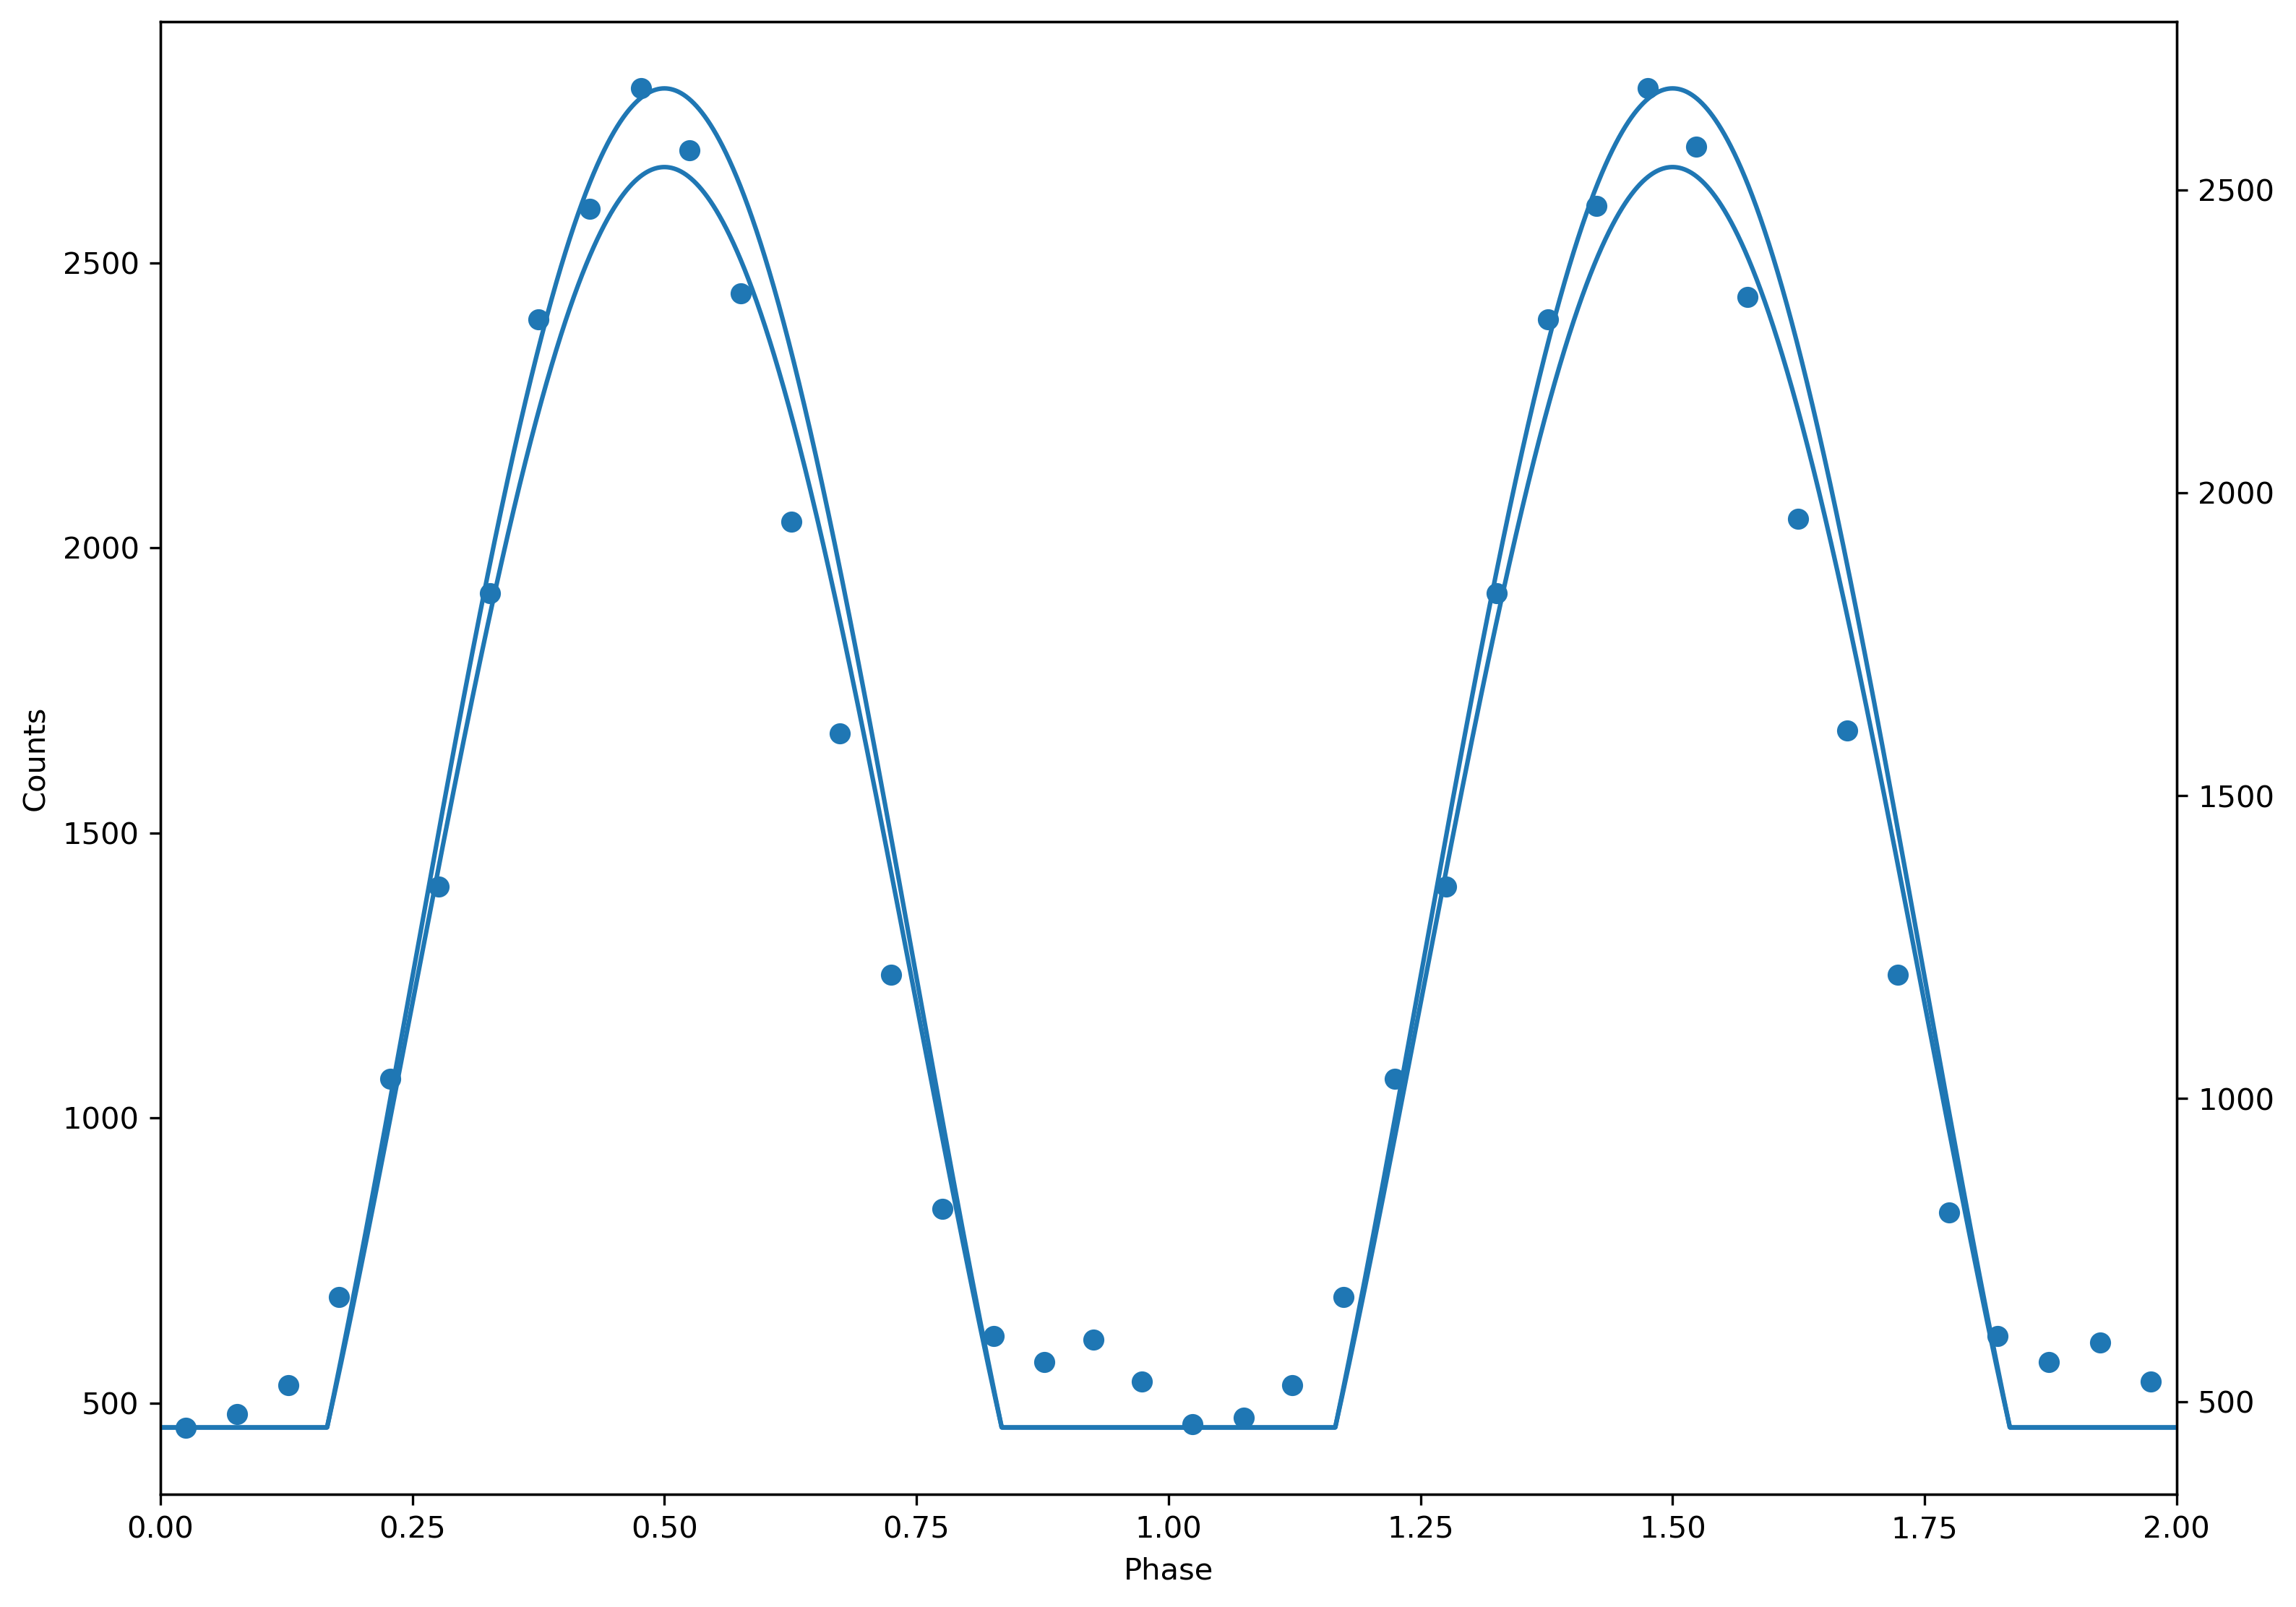

In [41]:
#set lapse as 1/3 2pic

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize

def mu_1(x, theta, i, m):
    y = np.sin(theta) * np.sin(i) * np.cos(2 * 3.1415926 * x) + np.cos(theta) * np.cos(i)
    F = m * (y * (1. - 1. / 2.5) + 1. / 2.5)
    return F

def mu_2(x, theta, i, m):
    y = np.sin(theta) * np.sin(i) * np.cos(2 * 3.1415926 * x) + np.cos(theta) * np.cos(i)
    F = m * (y * (1. - 1. / 3.) + 1. / 3.)
    return F

#1E 1048.1−5937 from paper:NUSTAR OBSERVATIONS OF MAGNETAR 1E 1048.1−5937     Auther:C. Yang
df = pd.read_csv('pulse_profile_data.csv', header = 0)
x_data = df.iloc[:,0]
y_data = df.iloc[:,1]
#print(x, y)
#only use data of one phase
# x_data = x_data[0:16]
# y_data = y_data[0:16]
print(y_data[0])

x = np.linspace(-0.5, 2.5, 10000)

parameter_initial = np.array([-1.5, 1, 4000])

# def func(x, a, b, c, d):
#     return (a * np.sin(b * 3.1415926 * x + c) + abs(a * np.sin(b * 3.1415926 * x + c))) / 2 + d

#set d as minium y
def func_1(x, a, b, c):
    return (mu_1(x, a, b, c) + abs(mu_1(x, a, b, c))) / 2 + 457.1428571428569


def func_2(x, a, b, c):
    return (mu_2(x, a, b, c) + abs(mu_2(x, a, b, c))) / 2 + 457.1428571428569


# paramater_optimal, covariance = scipy.optimize.curve_fit(func, x_data, y_data, p0 = parameter_initial)
# print(paramater_optimal)
# fitting = func(x, paramater_optimal[0], paramater_optimal[1], paramater_optimal[2], paramater_optimal[3])

paramater_optimal_1, covariance_1 = scipy.optimize.curve_fit(func_1, x_data, y_data, p0 = parameter_initial)
print(paramater_optimal_1)
fitting_1 = func_1(x, paramater_optimal_1[0], paramater_optimal_1[1], paramater_optimal_1[2])

paramater_optimal_2, covariance_2 = scipy.optimize.curve_fit(func_2, x_data, y_data, p0 = parameter_initial)
print(paramater_optimal_2)
fitting_2 = func_2(x, paramater_optimal_2[0], paramater_optimal_2[1], paramater_optimal_2[2])

fig, ax1 = plt.subplots(dpi = 300, figsize = (12, 9))
plt.scatter(x_data, y_data)
plt.xlim(0, 2)
ax1.plot(x, fitting_1)
ax1.set_xlabel('Phase')
ax1.set_ylabel('Counts')

ax2 = ax1.twinx()
ax2.plot(x, fitting_2)

plt.show()

457.1428571428569
r_g=2: theta, i, amp, quisent = [-1.73956663e+00  1.53684027e+00  2.33242229e+03  2.20098547e+02]
r_g=3: theta, i amp, quisent = [-2.11612771e+00  1.12408344e+00  3.06903877e+03  5.61071429e+02]


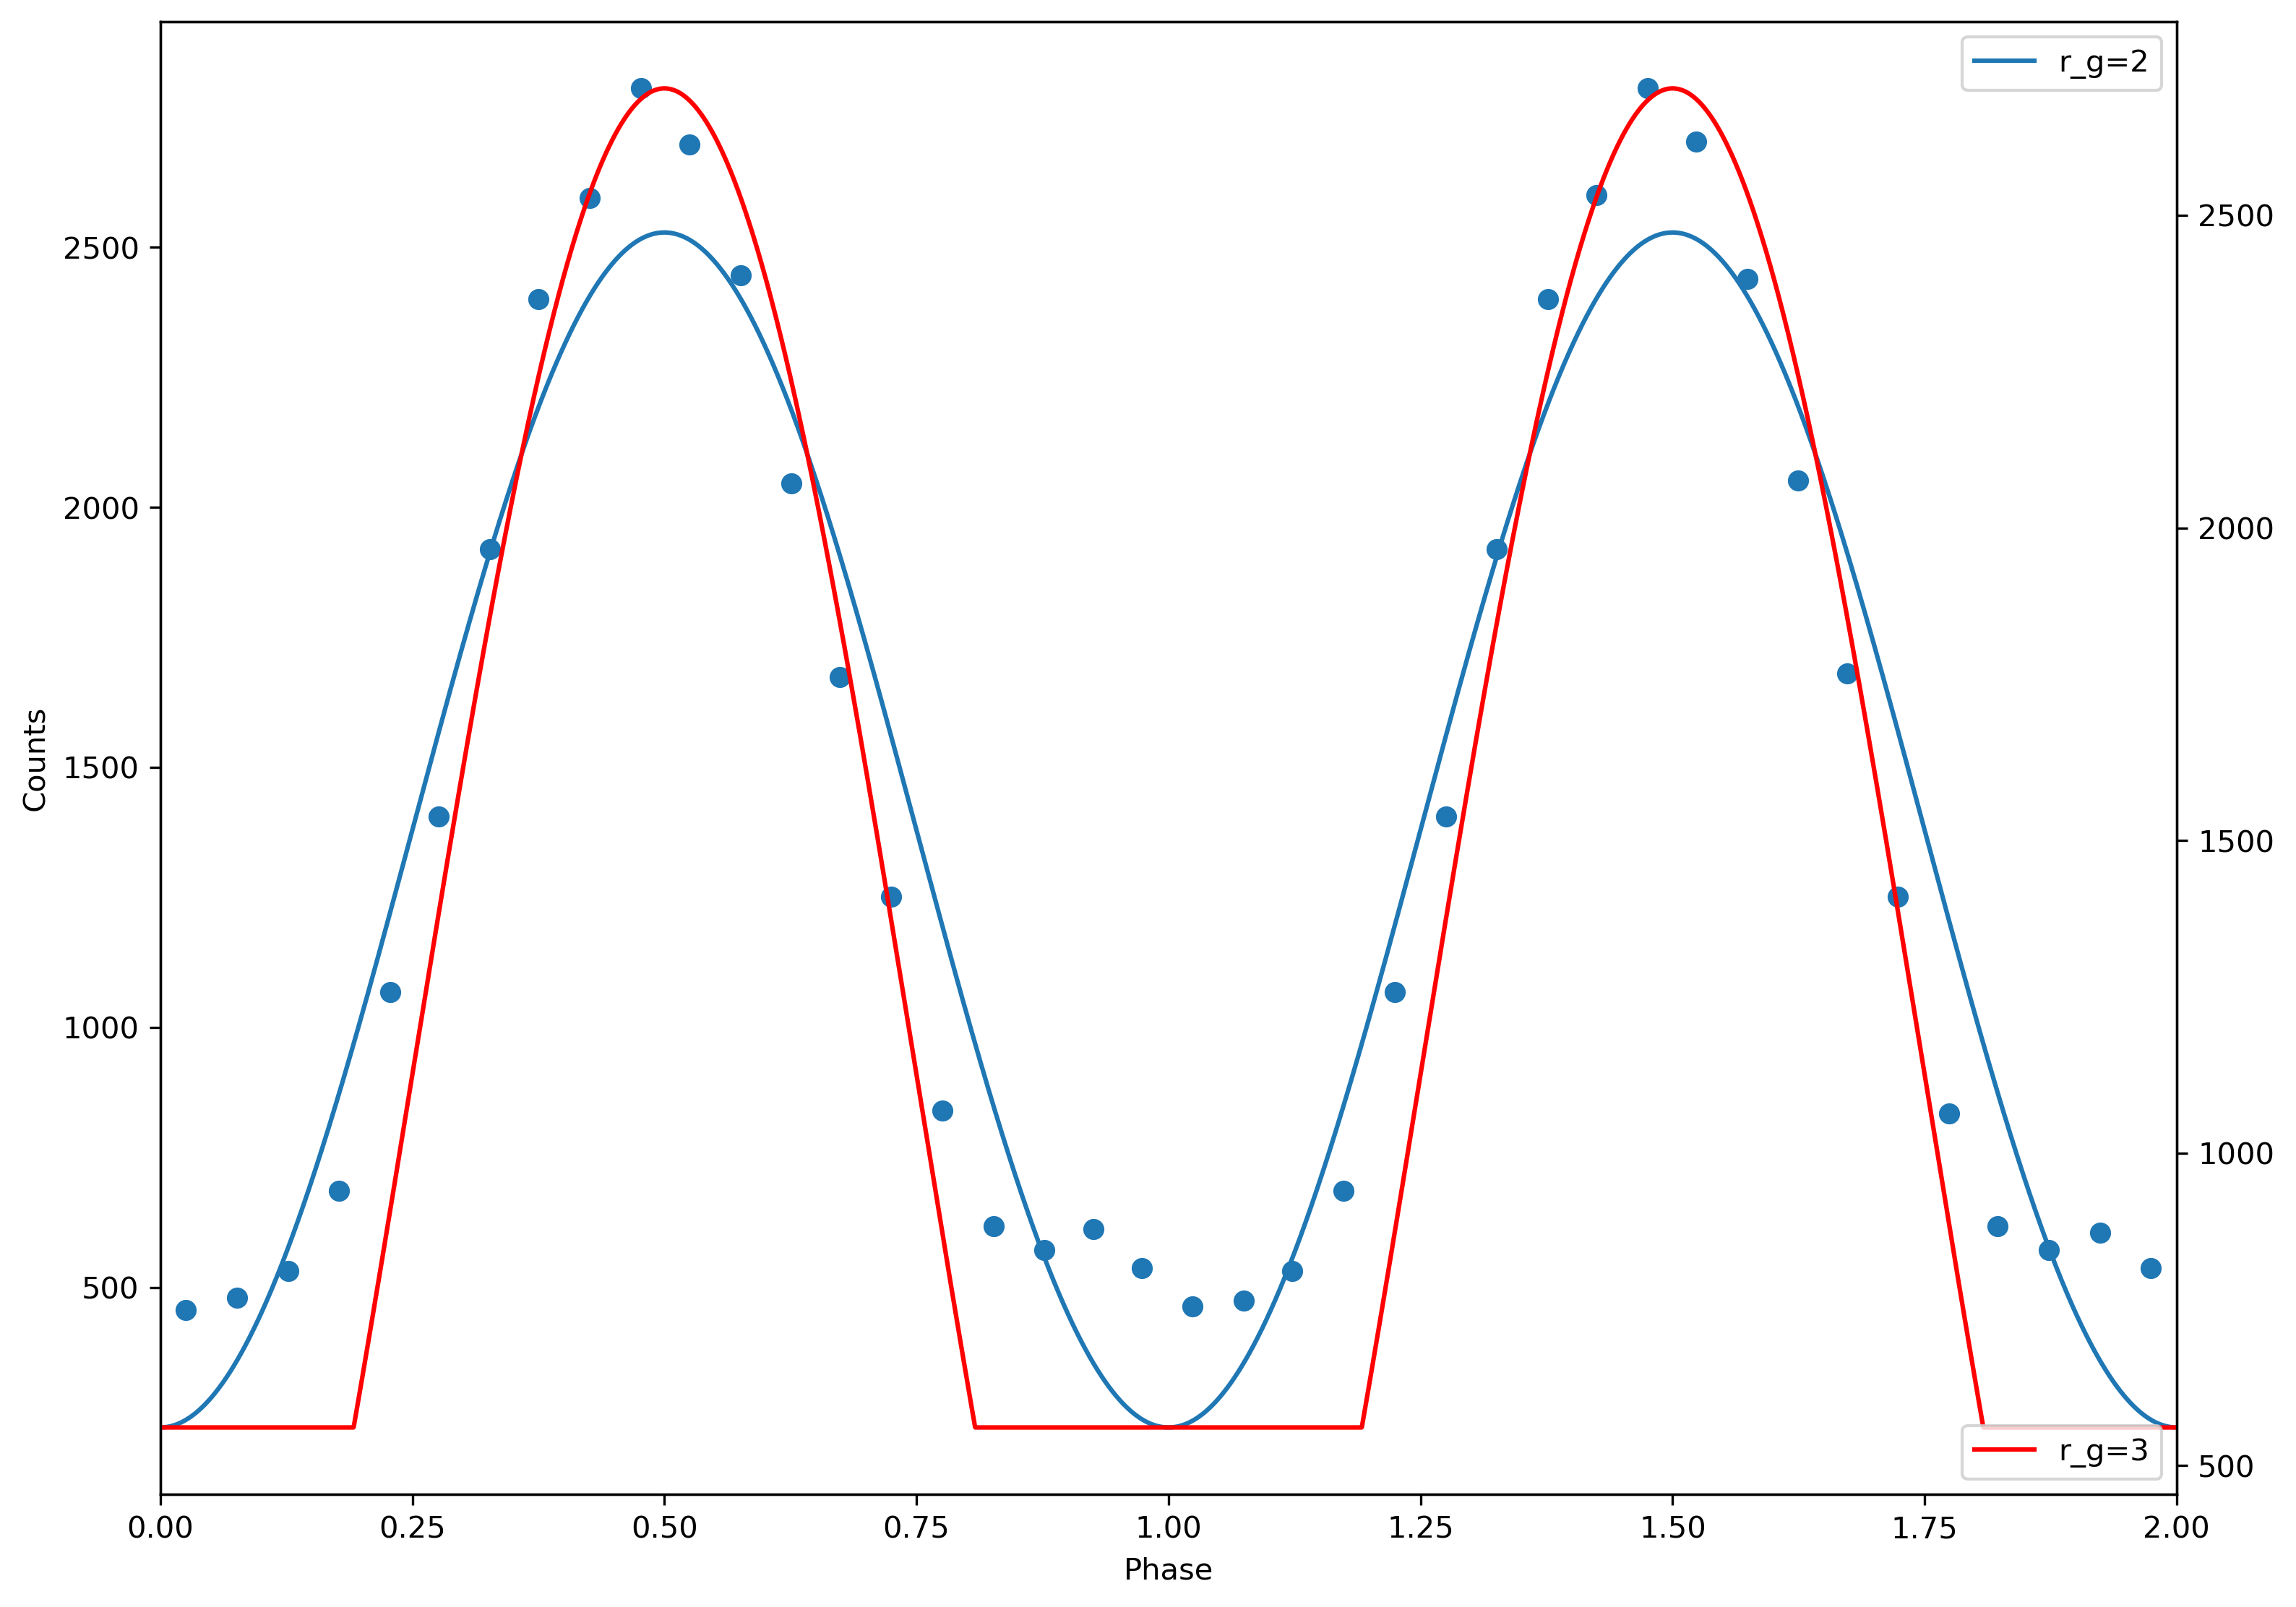

In [58]:
#set lapse as 1/3 2pic

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize

def mu_1(x, theta, i, m):
    y = np.sin(theta) * np.sin(i) * np.cos(2 * 3.1415926 * x) + np.cos(theta) * np.cos(i)
    F = m * (y * (1. - 1. / 2.) + 1. / 2.)
    return F

def mu_2(x, theta, i, m):
    y = np.sin(theta) * np.sin(i) * np.cos(2 * 3.1415926 * x) + np.cos(theta) * np.cos(i)
    F = m * (y * (1. - 1. / 3.) + 1. / 3.)
    return F

#1E 1048.1−5937 from paper:NUSTAR OBSERVATIONS OF MAGNETAR 1E 1048.1−5937     Auther:C. Yang
df = pd.read_csv('pulse_profile_data.csv', header = 0)
x_data = df.iloc[:,0]
y_data = df.iloc[:,1]
#print(x, y)
#only use data of one phase
# x_data = x_data[0:16]
# y_data = y_data[0:16]
print(y_data[0])

x = np.linspace(-0.5, 2.5, 10000)

parameter_initial = np.array([0, 1, 2000, 490])

# def func(x, a, b, c, d):
#     return (a * np.sin(b * 3.1415926 * x + c) + abs(a * np.sin(b * 3.1415926 * x + c))) / 2 + d

#set d as minium y
def func_1(x, a, b, c, d):
    return (mu_1(x, a, b, c) + abs(mu_1(x, a, b, c, ))) / 2 + d


def func_2(x, a, b, c, d):
    return (mu_2(x, a, b, c) + abs(mu_2(x, a, b, c))) / 2 + d


# paramater_optimal, covariance = scipy.optimize.curve_fit(func, x_data, y_data, p0 = parameter_initial)
# print(paramater_optimal)
# fitting = func(x, paramater_optimal[0], paramater_optimal[1], paramater_optimal[2], paramater_optimal[3])

paramater_optimal_1, covariance_1 = scipy.optimize.curve_fit(func_1, x_data, y_data, p0 = parameter_initial)
print("r_g=2: theta, i, amp, quisent =", paramater_optimal_1)
fitting_1 = func_1(x, paramater_optimal_1[0], paramater_optimal_1[1], paramater_optimal_1[2],  paramater_optimal_1[3])

paramater_optimal_2, covariance_2 = scipy.optimize.curve_fit(func_2, x_data, y_data, p0 = parameter_initial)
print("r_g=3: theta, i amp, quisent =", paramater_optimal_2)
fitting_2 = func_2(x, paramater_optimal_2[0], paramater_optimal_2[1], paramater_optimal_2[2], paramater_optimal_2[3])



fig, ax1 = plt.subplots(dpi = 300, figsize = (12, 9))
plt.scatter(x_data, y_data)
plt.xlim(0, 2)
ax1.plot(x, fitting_1, label='r_g=2')
ax1.set_xlabel('Phase')
ax1.set_ylabel('Counts')
ax2 = ax1.twinx()
ax2.plot(x, fitting_2, color = 'r', label='r_g=3')
ax1.legend()
ax2.legend(loc = 'lower right')
plt.show()

In [5]:
#set lapse as 1/3, 2 hot spots, 軸対象



import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize

def mu_1(x, theta, i, m):
    y = np.sin(theta) * np.sin(i) * np.cos(2 * 3.1415926 * x) + np.cos(theta) * np.cos(i)
    F = m * (y * (1. - 1. / 3.) + 1. / 3.)
    return F

def mu_2(x, theta, i, m):
    y = np.sin(theta) * np.sin(i) * np.cos(2 * 3.1415926 * (x - 1)) + np.cos(theta) * np.cos(i)
    F = m * (y * (1. - 1. / 3.) + 1. / 3.)
    return F

#1E 1048.1−5937 from paper:NUSTAR OBSERVATIONS OF MAGNETAR 1E 1048.1−5937     Auther:C. Yang
df = pd.read_csv('pulse_profile_data.csv', header = 0)
x_data = df.iloc[:,0]
y_data = df.iloc[:,1]
#print(x, y)
#only use data of one phase
# x_data = x_data[0:16]
# y_data = y_data[0:16]
print(y_data[0])

x = np.linspace(-0.5, 2.5, 10000)

parameter_initial = np.array([0, 1, 2000, 50, 450])

# def func(x, a, b, c, d):
#     return (a * np.sin(b * 3.1415926 * x + c) + abs(a * np.sin(b * 3.1415926 * x + c))) / 2 + d

#set d as minium y
def func_1(x, a, b, c, d, e):
    return (mu_1(x, a, b, c) + abs(mu_1(x, a, b, c))) / 2 + (mu_2(x, -a, b, d) + abs(mu_2(x, -a, b, d))) / 2 + e



# paramater_optimal, covariance = scipy.optimize.curve_fit(func, x_data, y_data, p0 = parameter_initial)
# print(paramater_optimal)
# fitting = func(x, paramater_optimal[0], paramater_optimal[1], paramater_optimal[2], paramater_optimal[3])

paramater_optimal_1, covariance_1 = scipy.optimize.curve_fit(func_1, x_data, y_data, p0 = parameter_initial)
print("r_g=3: theta_1, i, amp_1, amp_2, quisent =", paramater_optimal_1)
fitting_1 = func_1(x, paramater_optimal_1[0], paramater_optimal_1[1], paramater_optimal_1[2],  paramater_optimal_1[3], paramater_optimal_1[4])

# paramater_optimal_2, covariance_2 = scipy.optimize.curve_fit(func_2, x_data, y_data, p0 = parameter_initial)
# print("r_g=3: theta, i amp, quisent =", paramater_optimal_2)
# fitting_2 = func_2(x, paramater_optimal_2[0], paramater_optimal_2[1], paramater_optimal_2[2], paramater_optimal_2[3])

#calculate reduced chisq of this model
y_fit = func(x_data, *paramater_optimal)
r = y_data - y_fit
stdev = 51 / 2793 * y_data
chisq = np.sum((r / stdev) ** 2)
N_data = 40 #number of data
N_para = 5 #number of parameters (of model) used for fitting
dof = N_data - N_para
reduced_chisq = chisq / dof

print("chisq is " , chisq)
print("Reduced chisq is ", reduced_chisq)

# fig, ax1 = plt.subplots(dpi = 300, figsize = (12, 9))
# plt.scatter(x_data, y_data)
# plt.xlim(0, 2)
# ax1.plot(x, fitting_1, label='r_g=2')
# ax1.set_xlabel('Phase')
# ax1.set_ylabel('Counts')
# ax2 = ax1.twinx()
# ax2.plot(x, fitting_2, color = 'r', label='r_g=3')
# ax1.legend()
# ax2.legend(loc = 'lower right')
# plt.show()

fig, ax = plt.subplots(dpi = 300, figsize = (12, 9))
plt.scatter(x_data, y_data)
plt.xlim(0, 2)
plt.plot(x, fitting_1)
ax.set_xlabel('Phase')
ax.set_ylabel('Counts')

457.1428571428569
r_g=3: theta_1, i, amp_1, amp_2, quisent = [-4.02303455e+00 -1.39449922e+00  2.49340173e+03 -1.29020788e+03
  5.32116699e+02]


NameError: name 'func' is not defined

457.1428571428569
r_g=3: theta_1, i, amp_1, amp_2 [-9.85068695e-01  9.57421943e-01  2.52928201e+03 -1.84103227e+00]
chisq is  7845.356915116925
Reduced chisq is  224.15305471762642


Text(0, 0.5, 'Counts')

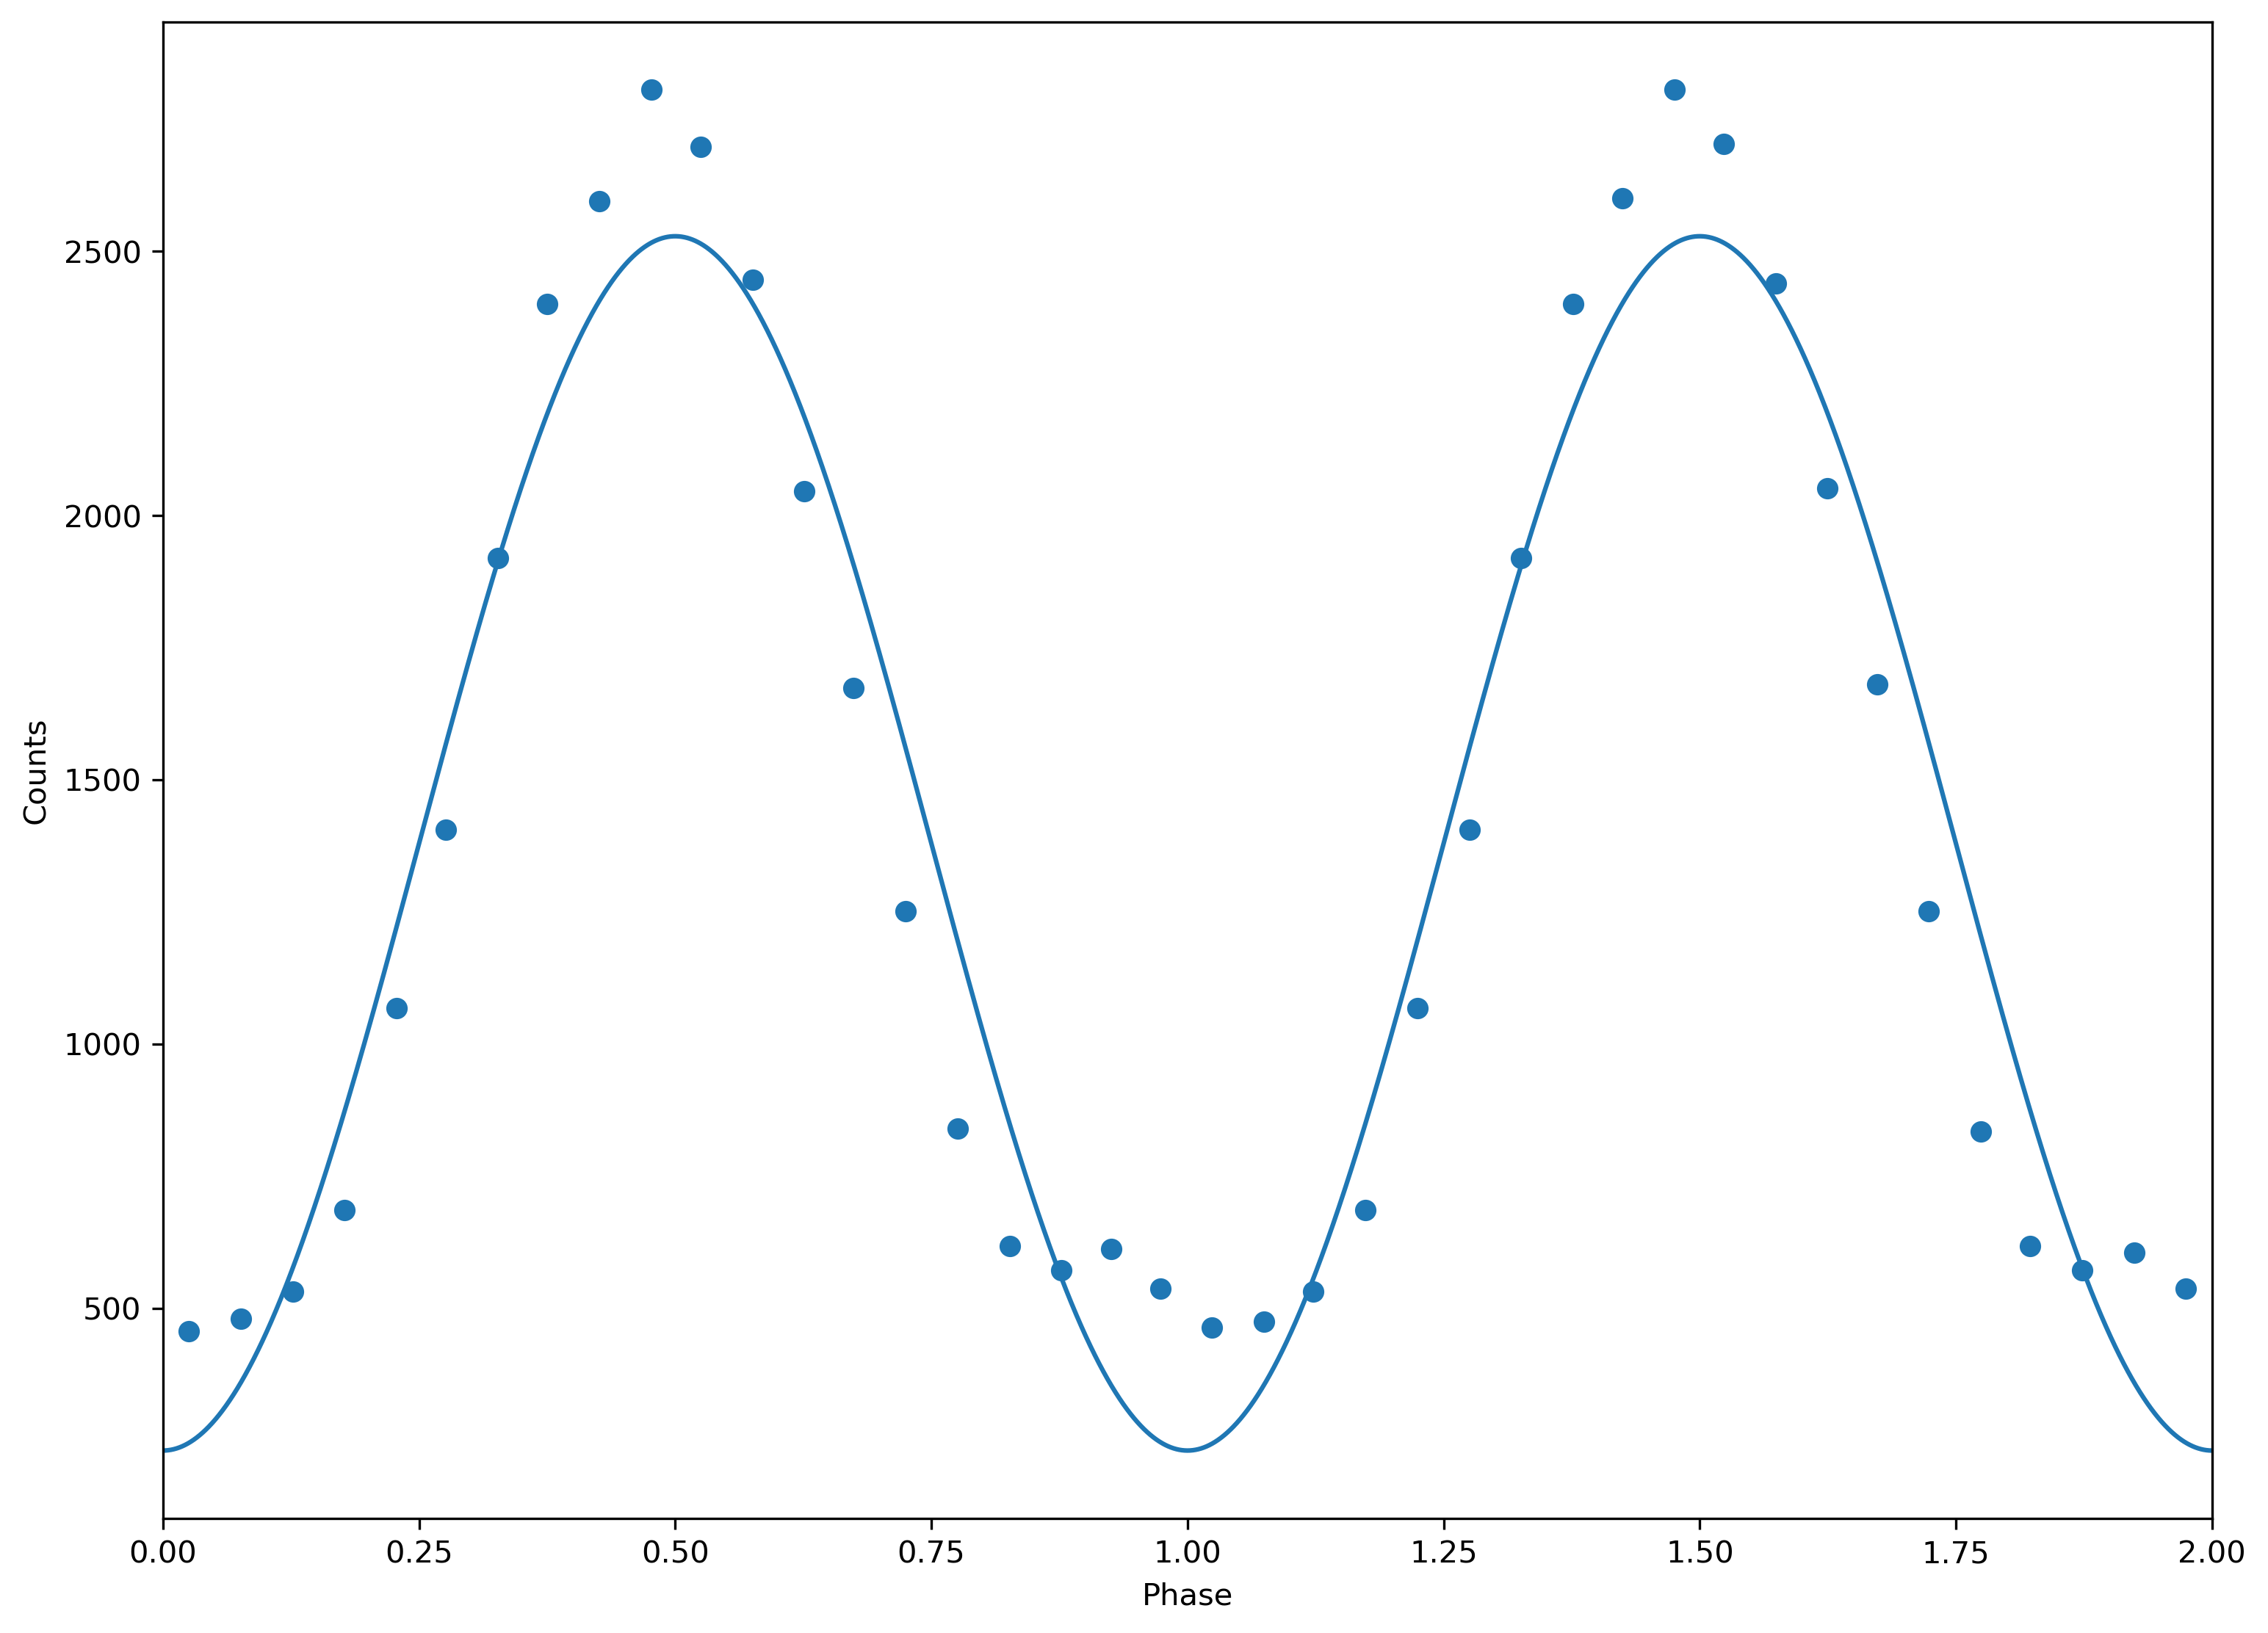

In [8]:
#set lapse as 1/3, 2 hot spots, 軸対象, 定常放射なし



import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize

def mu_1(x, theta, i, phi, m):
    y = np.sin(theta) * np.sin(i) * np.cos(2 * 3.1415926 * (x - phi) + np.cos(theta) * np.cos(i)
    F = m * (y * (1. - 1. / 3.) + 1. / 3.)
    return F

def mu_2(x, theta, i, phi, m):
    y = np.sin(theta) * np.sin(i) * np.cos(2 * 3.1415926 * (x - 1 - phi)) + np.cos(theta) * np.cos(i)
    F = m * (y * (1. - 1. / 3.) + 1. / 3.)
    return F

#1E 1048.1−5937 from paper:NUSTAR OBSERVATIONS OF MAGNETAR 1E 1048.1−5937     Auther:C. Yang
df = pd.read_csv('pulse_profile_data.csv', header = 0)
x_data = df.iloc[:,0]
y_data = df.iloc[:,1]
#print(x, y)
#only use data of one phase
# x_data = x_data[0:16]
# y_data = y_data[0:16]
print(y_data[0])

x = np.linspace(-0.5, 2.5, 10000)

parameter_initial = np.array([0, 1, 2000, 50])

# def func(x, a, b, c, d):
#     return (a * np.sin(b * 3.1415926 * x + c) + abs(a * np.sin(b * 3.1415926 * x + c))) / 2 + d

#set d as minium y
def func_1(x, a, b, c, d):
    return (mu_1(x, a, b, c) + abs(mu_1(x, a, b, c))) / 2 + (mu_2(x, -a, b, d) + abs(mu_2(x, -a, b, d))) / 2



# paramater_optimal, covariance = scipy.optimize.curve_fit(func, x_data, y_data, p0 = parameter_initial)
# print(paramater_optimal)
# fitting = func(x, paramater_optimal[0], paramater_optimal[1], paramater_optimal[2], paramater_optimal[3])

paramater_optimal_1, covariance_1 = scipy.optimize.curve_fit(func_1, x_data, y_data, p0 = parameter_initial)
print("r_g=3: theta_1, i, amp_1, amp_2", paramater_optimal_1)
fitting_1 = func_1(x, paramater_optimal_1[0], paramater_optimal_1[1], paramater_optimal_1[2],  paramater_optimal_1[3])

# paramater_optimal_2, covariance_2 = scipy.optimize.curve_fit(func_2, x_data, y_data, p0 = parameter_initial)
# print("r_g=3: theta, i amp, quisent =", paramater_optimal_2)
# fitting_2 = func_2(x, paramater_optimal_2[0], paramater_optimal_2[1], paramater_optimal_2[2], paramater_optimal_2[3])

#calculate reduced chisq of this model
y_fit = func_1(x_data, paramater_optimal_1[0], paramater_optimal_1[1], paramater_optimal_1[2], paramater_optimal_1[3])
r = y_data - y_fit
stdev = 51 / 2793 * y_data
chisq = np.sum((r / stdev) ** 2)
N_data = 40 #number of data
N_para = 5 #number of parameters (of model) used for fitting
dof = N_data - N_para
reduced_chisq = chisq / dof

print("chisq is " , chisq)
print("Reduced chisq is ", reduced_chisq)

# fig, ax1 = plt.subplots(dpi = 300, figsize = (12, 9))
# plt.scatter(x_data, y_data)
# plt.xlim(0, 2)
# ax1.plot(x, fitting_1, label='r_g=2')
# ax1.set_xlabel('Phase')
# ax1.set_ylabel('Counts')
# ax2 = ax1.twinx()
# ax2.plot(x, fitting_2, color = 'r', label='r_g=3')
# ax1.legend()
# ax2.legend(loc = 'lower right')
# plt.show()

fig, ax = plt.subplots(dpi = 300, figsize = (12, 9))
plt.scatter(x_data, y_data)
plt.xlim(0, 2)
plt.plot(x, fitting_1)
ax.set_xlabel('Phase')
ax.set_ylabel('Counts')

457.1428571428569
r_g=3: theta_1, i, amp_1, theta_2, amp_2, quisent = [1.08820354e+00 2.06820657e+00 3.03988700e+03 2.48047211e-16
 3.70160963e+01 5.60507580e+02]
chisq is  1213.1080031244126
Reduced chisq is  35.67964715071802


Text(0, 0.5, 'Counts')

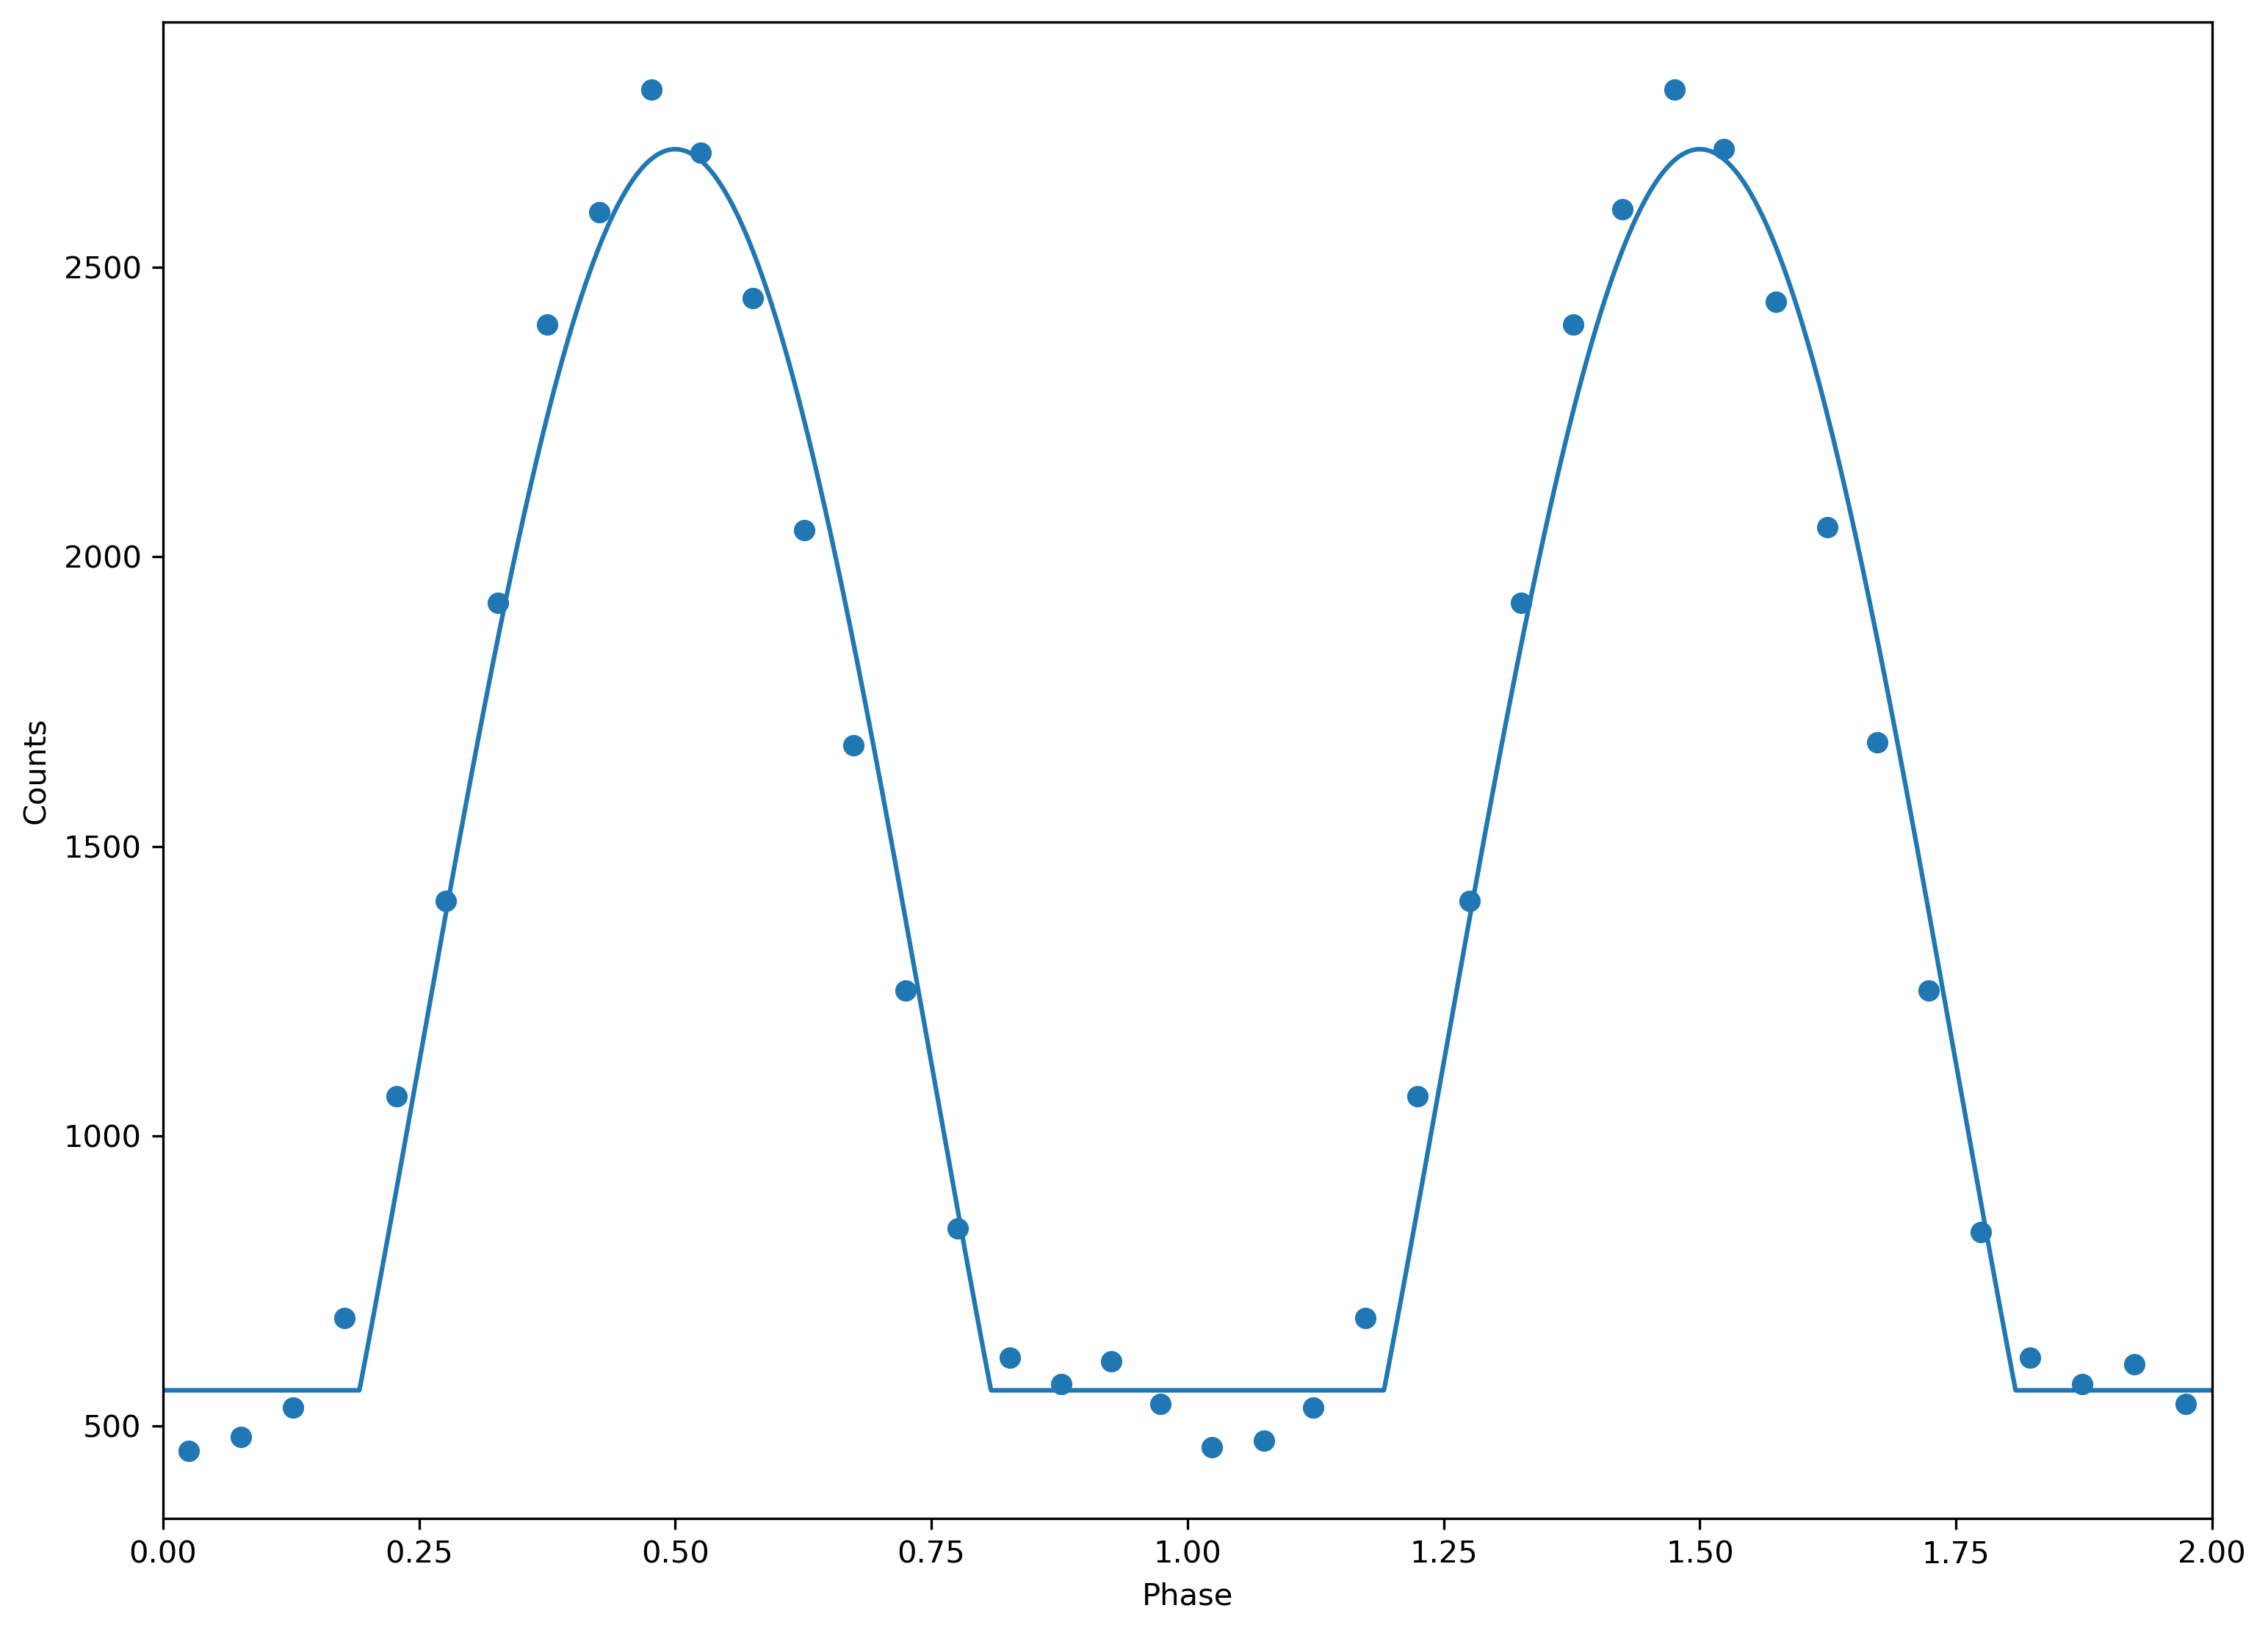

In [88]:
#set lapse as 1/3, 2 free hot spots




import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize

def mu_1(x, theta, i, m):
    y = np.sin(theta) * np.sin(i) * np.cos(2 * 3.1415926 * (x - 0.5)) + np.cos(theta) * np.cos(i)
    F = m * (y * (1. - 1. / 3.) + 1. / 3.)
    return F

def mu_2(x, theta, i, m):
    y = np.sin(theta) * np.sin(i) * np.cos(2 * 3.1415926 * x) + np.cos(theta) * np.cos(i)
    F = m * (y * (1. - 1. / 3.) + 1. / 3.)
    return F

#1E 1048.1−5937 from paper:NUSTAR OBSERVATIONS OF MAGNETAR 1E 1048.1−5937     Auther:C. Yang
df = pd.read_csv('pulse_profile_data.csv', header = 0)
x_data = df.iloc[:,0]
y_data = df.iloc[:,1]
#print(x, y)
#only use data of one phase
# x_data = x_data[0:16]
# y_data = y_data[0:16]
print(y_data[0])

x = np.linspace(-0.5, 2.5, 10000)

parameter_initial = np.array([0, 2, 2000, 1, 100, 450])

# def func(x, a, b, c, d):
#     return (a * np.sin(b * 3.1415926 * x + c) + abs(a * np.sin(b * 3.1415926 * x + c))) / 2 + d

#set d as minium y
def func_1(x, a, b, c, d, e, f):
    return (mu_1(x, a, b, c) + abs(mu_1(x, a, b, c))) / 2 + (mu_2(x, d, b, e) + abs(mu_2(x, d, b, e))) / 2 + f



# paramater_optimal, covariance = scipy.optimize.curve_fit(func, x_data, y_data, p0 = parameter_initial)
# print(paramater_optimal)
# fitting = func(x, paramater_optimal[0], paramater_optimal[1], paramater_optimal[2], paramater_optimal[3])

paramater_optimal_1, covariance_1 = scipy.optimize.curve_fit(func_1, x_data, y_data, p0 = parameter_initial, bounds=([0, -2, 0, 0, 0, 0],[3.1415926, 3.1415926, 4000, 3.1415926, 500, 600]))
print("r_g=3: theta_1, i, amp_1, theta_2, amp_2, quisent =", paramater_optimal_1)
fitting_1 = func_1(x, paramater_optimal_1[0], paramater_optimal_1[1], paramater_optimal_1[2],  paramater_optimal_1[3], paramater_optimal_1[4], paramater_optimal_1[5])

y_fit = func_1(x_data, *paramater_optimal_1)
r = y_data - y_fit
stdev = 51 / 2793 * y_data
chisq = np.sum((r / stdev) ** 2)
N_data = 40
N_para = 6
dof = N_data - N_para
reduced_chisq = chisq / dof

print("chisq is " , chisq)
print("Reduced chisq is ", reduced_chisq)

# paramater_optimal_2, covariance_2 = scipy.optimize.curve_fit(func_2, x_data, y_data, p0 = parameter_initial)
# print("r_g=3: theta, i amp, quisent =", paramater_optimal_2)
# fitting_2 = func_2(x, paramater_optimal_2[0], paramater_optimal_2[1], paramater_optimal_2[2], paramater_optimal_2[3])

# fig, ax1 = plt.subplots(dpi = 300, figsize = (12, 9))
# plt.scatter(x_data, y_data)
# plt.xlim(0, 2)
# ax1.plot(x, fitting_1, label='r_g=2')
# ax1.set_xlabel('Phase')
# ax1.set_ylabel('Counts')
# ax2 = ax1.twinx()
# ax2.plot(x, fitting_2, color = 'r', label='r_g=3')
# ax1.legend()
# ax2.legend(loc = 'lower right')
# plt.show()
fig, ax = plt.subplots(dpi = 300, figsize = (12, 9))
plt.scatter(x_data, y_data)
plt.xlim(0, 2)
plt.plot(x, fitting_1)
ax.set_xlabel('Phase')
ax.set_ylabel('Counts')

457.1428571428569
r_g=3: theta_1, i, amp [-1.19823396e+00  9.19826461e-01 -7.61576180e-02  2.59177438e+03]


Text(0, 0.5, 'Counts')

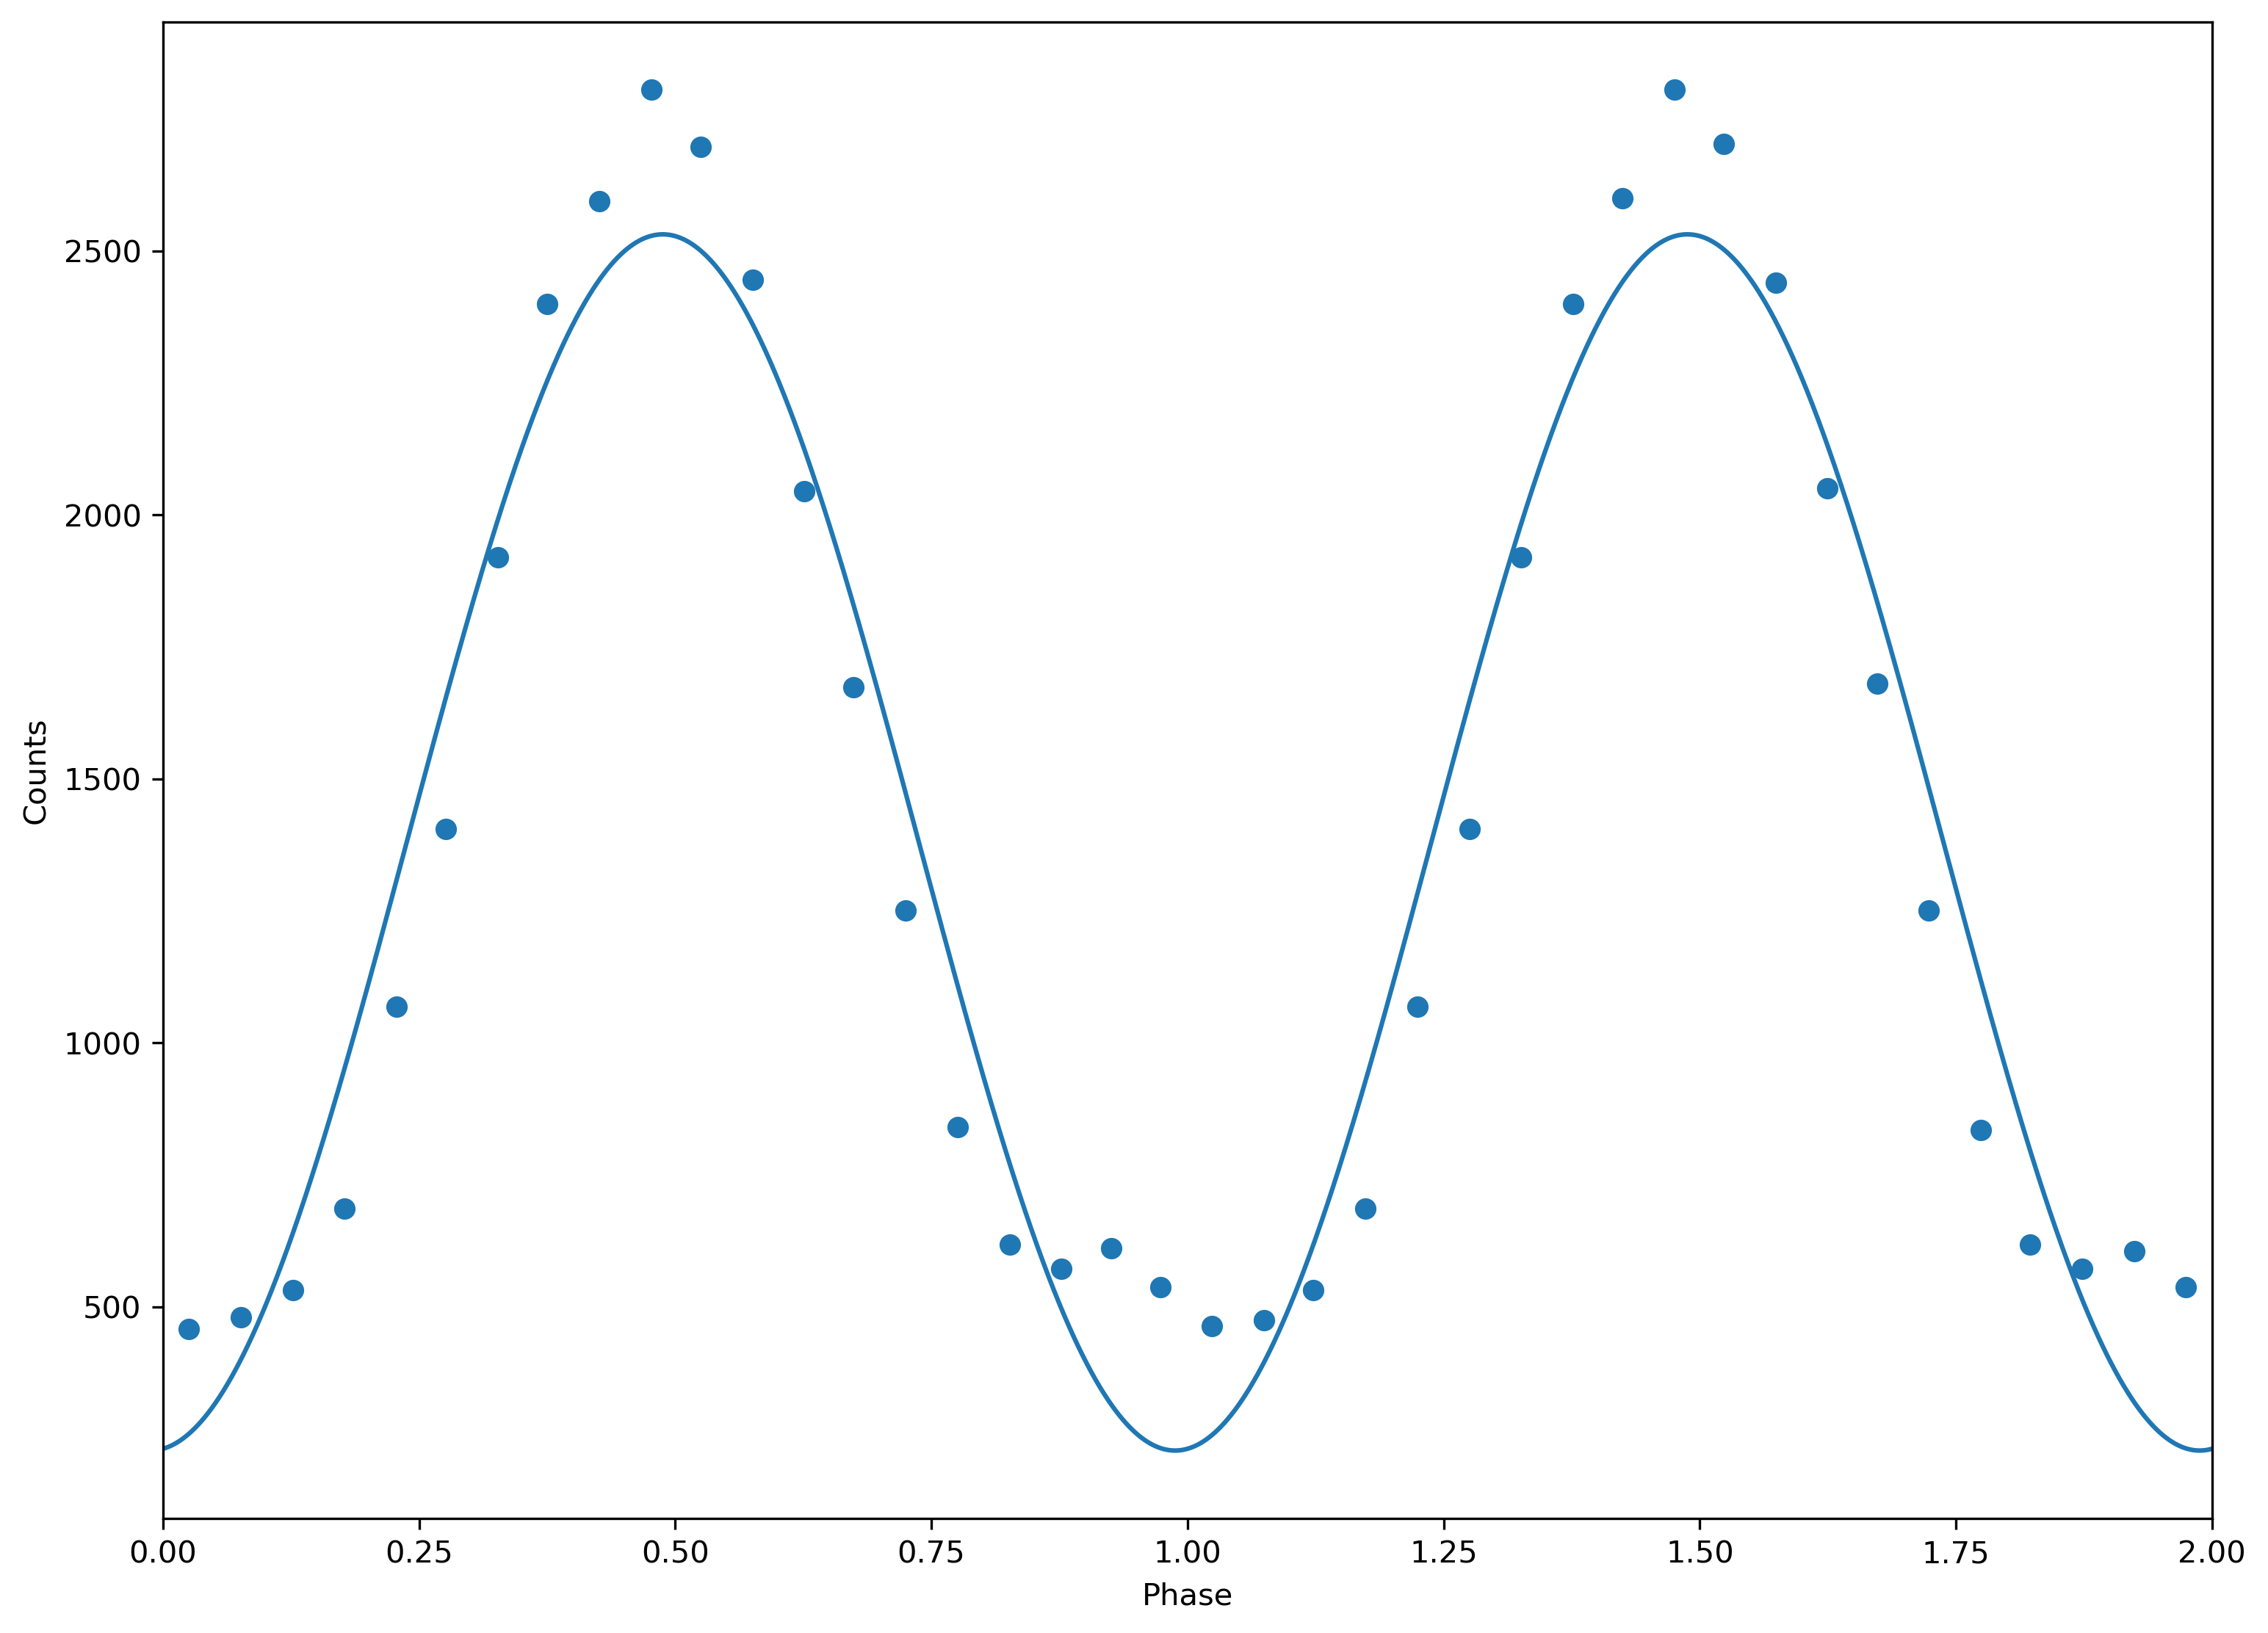

In [12]:
#set lapse as 1/3, single hot spot with beaming effect

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize

def mu(x, theta, i, phi, m):
    y = np.sin(theta) * np.sin(i) * np.cos(2 * 3.1415926 * x - phi) + np.cos(theta) * np.cos(i)
    F = m * (y * (1. - 1. / 2.5) + 1. / 2.5)
    return F

#1E 1048.1−5937 from paper:NUSTAR OBSERVATIONS OF MAGNETAR 1E 1048.1−5937     Auther:C. Yang
df = pd.read_csv('pulse_profile_data.csv', header = 0)
x_data = df.iloc[:,0]
y_data = df.iloc[:,1]
#print(x, y)
#only use data of one phase
# x_data = x_data[0:16]
# y_data = y_data[0:16]
print(y_data[0])

x = np.linspace(-0.5, 2.5, 10000)

parameter_initial = np.array([-1.5, 1, 0.2, 4000])

# def func(x, a, b, c, d):
#     return (a * np.sin(b * 3.1415926 * x + c) + abs(a * np.sin(b * 3.1415926 * x + c))) / 2 + d

#set d as minium y
def func(x, a, b, c, d):
    return (mu(x, a, b, c, d) + abs(mu(x, a, b, c, d))) / 2

# paramater_optimal, covariance = scipy.optimize.curve_fit(func, x_data, y_data, p0 = parameter_initial)
# print(paramater_optimal)
# fitting = func(x, paramater_optimal[0], paramater_optimal[1], paramater_optimal[2], paramater_optimal[3])

paramater_optimal, covariance = scipy.optimize.curve_fit(func, x_data, y_data, p0 = parameter_initial)
print("r_g=3: theta_1, i, amp", paramater_optimal)
fitting = func(x, paramater_optimal[0], paramater_optimal[1], paramater_optimal[2],  paramater_optimal[3])

y_fit = func(x_data, *paramater_optimal)
# r = y_data - y_fit
# stdev = 51 / 2793 * y_data
# chisq = np.sum((r / stdev) ** 2)
# N_data = 40
# N_para = 6
# dof = N_data - N_para
# reduced_chisq = chisq / dof

# print("chisq is " , chisq)
# print("Reduced chisq is ", reduced_chisq)


fig, ax = plt.subplots(dpi = 300, figsize = (12, 9))
plt.scatter(x_data, y_data)
plt.xlim(0, 2)
plt.plot(x, fitting)
ax.set_xlabel('Phase')
ax.set_ylabel('Counts')

In [ ]:
# test read .fef file

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize
import os
from astropy.io import fits

# -----------
# Define
# -----------
r_dir="~/data/"
r_file="ni1020240136.fef"

